In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette("tab10")

pd.set_option('display.max_rows', None)

# **1. Business Understanding**

### **Pendahuluan**

Industri transportasi di New York City, khususnya dalam layanan taksi dan transportasi berbasis aplikasi, menghadapi tantangan terkait dengan pengelolaan armada, dan efisiensi operasional. Dari analisis pola perjalanan yang dilakukan, ditemukan beberapa tren yang menunjukkan bahwa volume perjalanan cenderung meningkat pada jam sibuk pagi dan sore, dengan puncaknya pada hari Selasa. Selain itu, faktor-faktor seperti jarak perjalanan, durasi, dan jenis pemesanan memiliki pengaruh yang signifikan terhadap jumlah tip yang diterima pengemudi. Oleh karena itu, penting bagi berbagai stakeholder dalam ekosistem ini untuk memahami tren tersebut guna membuat keputusan yang lebih responsifberdasrkan data.

Pentingnya pemahaman ini bertujuan untuk memaksimalkan potensi pendapatan, meningkatkan pengalaman pengguna, serta mengoptimalkan alokasi armada dan pengelolaan infrastruktur. Dengan insight yang diberikan, perusahaan transportasi, otoritas transportasi kota, dan platform pemesanan transportasi dapat merancang strategi yang lebih tepat sasaran, baik dari sisi operasional maupun pelayanan pelanggan.

### **Businees Objective**

- Menyusun strategi untuk mengalokasikan kendaraan dengan lebih tepat berdasarkan waktu dan lokasi dengan volume perjalanan tinggi.
- Menyediakan layanan yang lebih baik melalui penyesuaian algoritma pemesanan, fitur premium, dan pelatihan pengemudi.
- Memberikan wawasan dan insentif kepada pengemudi untuk meningkatkan tip dengan memahami faktor-faktor yang memengaruhi jumlah tip.
- Merancang kebijakan transportasi dan infrastruktur yang dapat mengakomodasi volume perjalanan yang tinggi, terutama di area-area dengan permintaan lebih besar.

### **Stakeholders**
Berikut ini rincian potensial stakeholders :
#### 1. Perusahaan Transportasi atau Operator Taksi
- Menggunakan wawasan tentang pola perjalanan untuk mengoptimalkan armada selama jam sibuk, hari tertentu, dan di lokasi strategis.
- **Manfaat**:
  - Mengurangi waktu tunggu pelanggan dengan alokasi kendaraan yang lebih baik.
  - Menyediakan pelatihan pengemudi tentang cara meningkatkan jumlah tip, seperti memanfaatkan rute tertentu atau meningkatkan layanan pelanggan pada perjalanan jarak jauh.

#### 2. Otoritas Transportasi Kota (seperti NYC Taxi and Limousine Commission)
- Otoritas transportasi dapat menggunakan data ini untuk merancang kebijakan yang meningkatkan efisiensi transportasi di New York City.
- **Manfaat**:
  - Mengembangkan strategi untuk mengurangi kemacetan selama jam sibuk di New York.
  - Meningkatkan infrastruktur di area dengan volume perjalanan tinggi.

#### 3. Pelanggan Korporat atau Perusahaan Teknologi Pemesanan Transportasi
- Platform pemesanan seperti Uber atau Lyft dapat memanfaatkan data untuk meningkatkan algoritma alokasi kendaraan dan pengalaman pelanggan.
- **Manfaat**:
  - Menyediakan opsi perjalanan yang disesuaikan dengan preferensi pelanggan, seperti estimasi durasi perjalanan atau area dengan tip lebih tinggi.
  - Menawarkan fitur promosi di hari dengan volume perjalanan tinggi, untuk meningkatkan loyalitas pelanggan.

# **2. Data Understanding**

Terdapat 2 jenis dataset yaitu:
- **NYC TLC Trip record (csv)** : data mentah yang merekam perjalanan taksi di New York City pada bulan Januari 2023.
- **Taxi zone lookup (csv)** : data ini mencakup nama wilayah dan zona yang terkait dengan setiap ID lokasi

Berikut ini, data spesifik untuk data set NYC TLC Trip record, yang mencakup:
- **VendorID** : Kode yang menunjukkan penyedia LPEP yang menyediakan record.<br>
1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc
- **lpep_pickup_datetime** : Tanggal dan waktu saat alat meter diaktifkan.
- **lpep_dropoff_datetime** : Tanggal dan waktu ketika alat meter dilepas.
- **passenger_count** : Jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan pengemudi.
- **trip_distance** : Jarak perjalanan yang ditempuh dalam **mil** dilaporkan oleh taksimeter.
- **PULocationID** : Zona Taksi TLC tempat argometer dipasang.
- **DOLocationID** : Zona Taksi TLC tempat argometer dimatikan.
- **RateCodeID** : Kode tarif akhir berlaku di akhir perjalanan.<br>
1=Standard rate; 2=JFK; 3=Newark; 4=Nassau or Westchester; 5=Negotiated fare; 6=Group ride
- **store_and_fwd_flag** : menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor, alias "store and forward" karena kendaraan tidak memiliki koneksi ke server. <br>
Y = store and forward trip; N = not a store and forward trip
- **payment_type** : Kode numerik yang menunjukkan bagaimana penumpang membayar biaya perjalanan.<br>
1 = Credit card – Pembayaran dilakukan menggunakan kartu kredit.;
2 = Cash – Pembayaran dilakukan dengan uang tunai.;
3 = No charge  – Perjalanan ini tidak dikenakan biaya, bisa jadi karena merupakan perjalanan gratis atau kondisi lainnya;
4 = Dispute – Biaya perjalanan sedang diperselisihkan, biasanya terkait dengan masalah layanan atau pembayaran.;
5 = Unknown - Metode pembayaran atau status perjalanan tidak diketahui atau tidak tercatat;
6 = Voided trip - Perjalanan dibatalkan dan tidak ada biaya yang dikenakan.
- **fare_amount** : Tarif waktu dan jarak dihitung berdasarkan argo (Extra Miscellaneous extras and surcharges).Saat ini, biaya tambahan hanya berlaku untuk jam sibuk dan biaya menginap sebesar **$0,50 dan $1**.
- **extra** : Biaya tambahan. Saat ini, biaya tambahan yang dikenakan **hanya 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.**
- **mta_tax** : Pajak MTA sebesar **$0,50** yang dipicu secara otomatis berdasarkan tarif terukur yang digunakan
- **improvement_surcharge** : Biaya perbaikan sebesar **$0,30** dibebankan pada perjalanan yang diberangkatkan pada saat flag drop. Biaya perbaikan mulai dikenakan pada tahun 2015.
- **tip_amount** : Kolom ini otomatis terisi untuk tip kartu kredit. **Tip tunai tidak termasuk.**
- **tolls_amount** : Jumlah total semua tol yang dibayarkan dalam perjalanan.
- **total_amount** : Jumlah total yang dibebankan kepada penumpang. **Tidak termasuk tip berupa uang tunai.**
- **trip_type** : Kode yang menunjukkan apakah perjalanan tersebut merupakan perjalanan street-hail atau dispatch, yang ditetapkan secara otomatis berdasarkan tarif argo yang digunakan, tetapi dapat diubah oleh pengemudi.<br>
1 = Street-hail (istilah yang digunakan untuk menggambarkan proses memanggil taksi langsung di jalan, tanpa menggunakan aplikasi atau sistem pemesanan sebelumnya);
2 = Dispatch (proses mengirimkan taksi ke pelanggan. Ketika seseorang memesan taksi, petugas akan memilih taksi yang tersedia dan mengirimkannya ke lokasi pelanggan. Proses ini bisa dilakukan lewat pusat panggilan atau aplikasi pemesanan taksi.)
- **congestion_surcharge** : Biaya kemacetan sebesar **$2,75** untuk **perjalanan taksi kuning dan hijau di southern Manhattan dari 96th Street** Biaya tambahan ini berlaku pada tahun 2019.<br>
Biaya tambahan tergantung pada jenis kendaraan yang digunakan:: 
    - Medallion taxicab: $2.50 per trip 
    - For-hire vehicle: $2.75 per trip 

# **3.Data Cleaning**

Proses data cleaning terdapat pada file **AisyahFitri_Capstone2_cleaning.ipynb**. Hasil data yang sudah bersih kemudian di simpan ke dalam file **NYC_TLC_Clean3.csv**

# **4.Data Anlysis**

In [71]:
#load data set
df = pd.read_csv('NYC_TLC_Clean3.csv')
df.head()

,lpep_pickup_datetime,pickup_hour,lpep_dropoff_datetime,passenger_count,trip_duration,duration_bins,trip_distance,RatecodeID,RatecodeID_dics,PULocationID,...,distance_bins,fare_amount,tip_amount,tip_amount_bins,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
0,2023-01-01 00:26:10,Midnight,2023-01-01 00:37:11,1,11.02,11-20 minutes,2.58,1,Standard rate,166,...,3-6 miles,14.9,4.03,1-5$,1.0,0.5,0.0,1.0,2.75,24.18
1,2023-01-01 00:51:03,Midnight,2023-01-01 00:57:49,1,6.77,<10 minutes,1.81,1,Standard rate,24,...,<2 miles,10.7,2.64,1-5$,1.0,0.5,0.0,1.0,0.00,15.84
2,2023-01-01 00:13:14,Midnight,2023-01-01 00:19:03,1,5.82,<10 minutes,1.30,1,Standard rate,41,...,<2 miles,6.5,1.70,1-5$,0.5,1.5,0.0,1.0,0.00,10.20
3,2023-01-01 00:33:04,Midnight,2023-01-01 00:39:02,1,5.97,<10 minutes,1.10,1,Standard rate,41,...,<2 miles,6.0,0.00,0$,0.5,1.5,0.0,1.0,0.00,8.00
4,2023-01-01 00:53:31,Midnight,2023-01-01 01:11:04,1,17.55,11-20 minutes,2.78,1,Standard rate,41,...,3-6 miles,17.7,0.00,0$,1.0,0.5,0.0,1.0,2.75,22.95


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1766034226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df, x=col, ax=axs[i],palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1766034226.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  bars = sns.countplot(data=df, x=col, ax=axs[i],palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1766034226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df, x=col, ax=axs[i],palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1766034226.py:7: UserWarning: The palette list has more values (10) than needed (6), whi

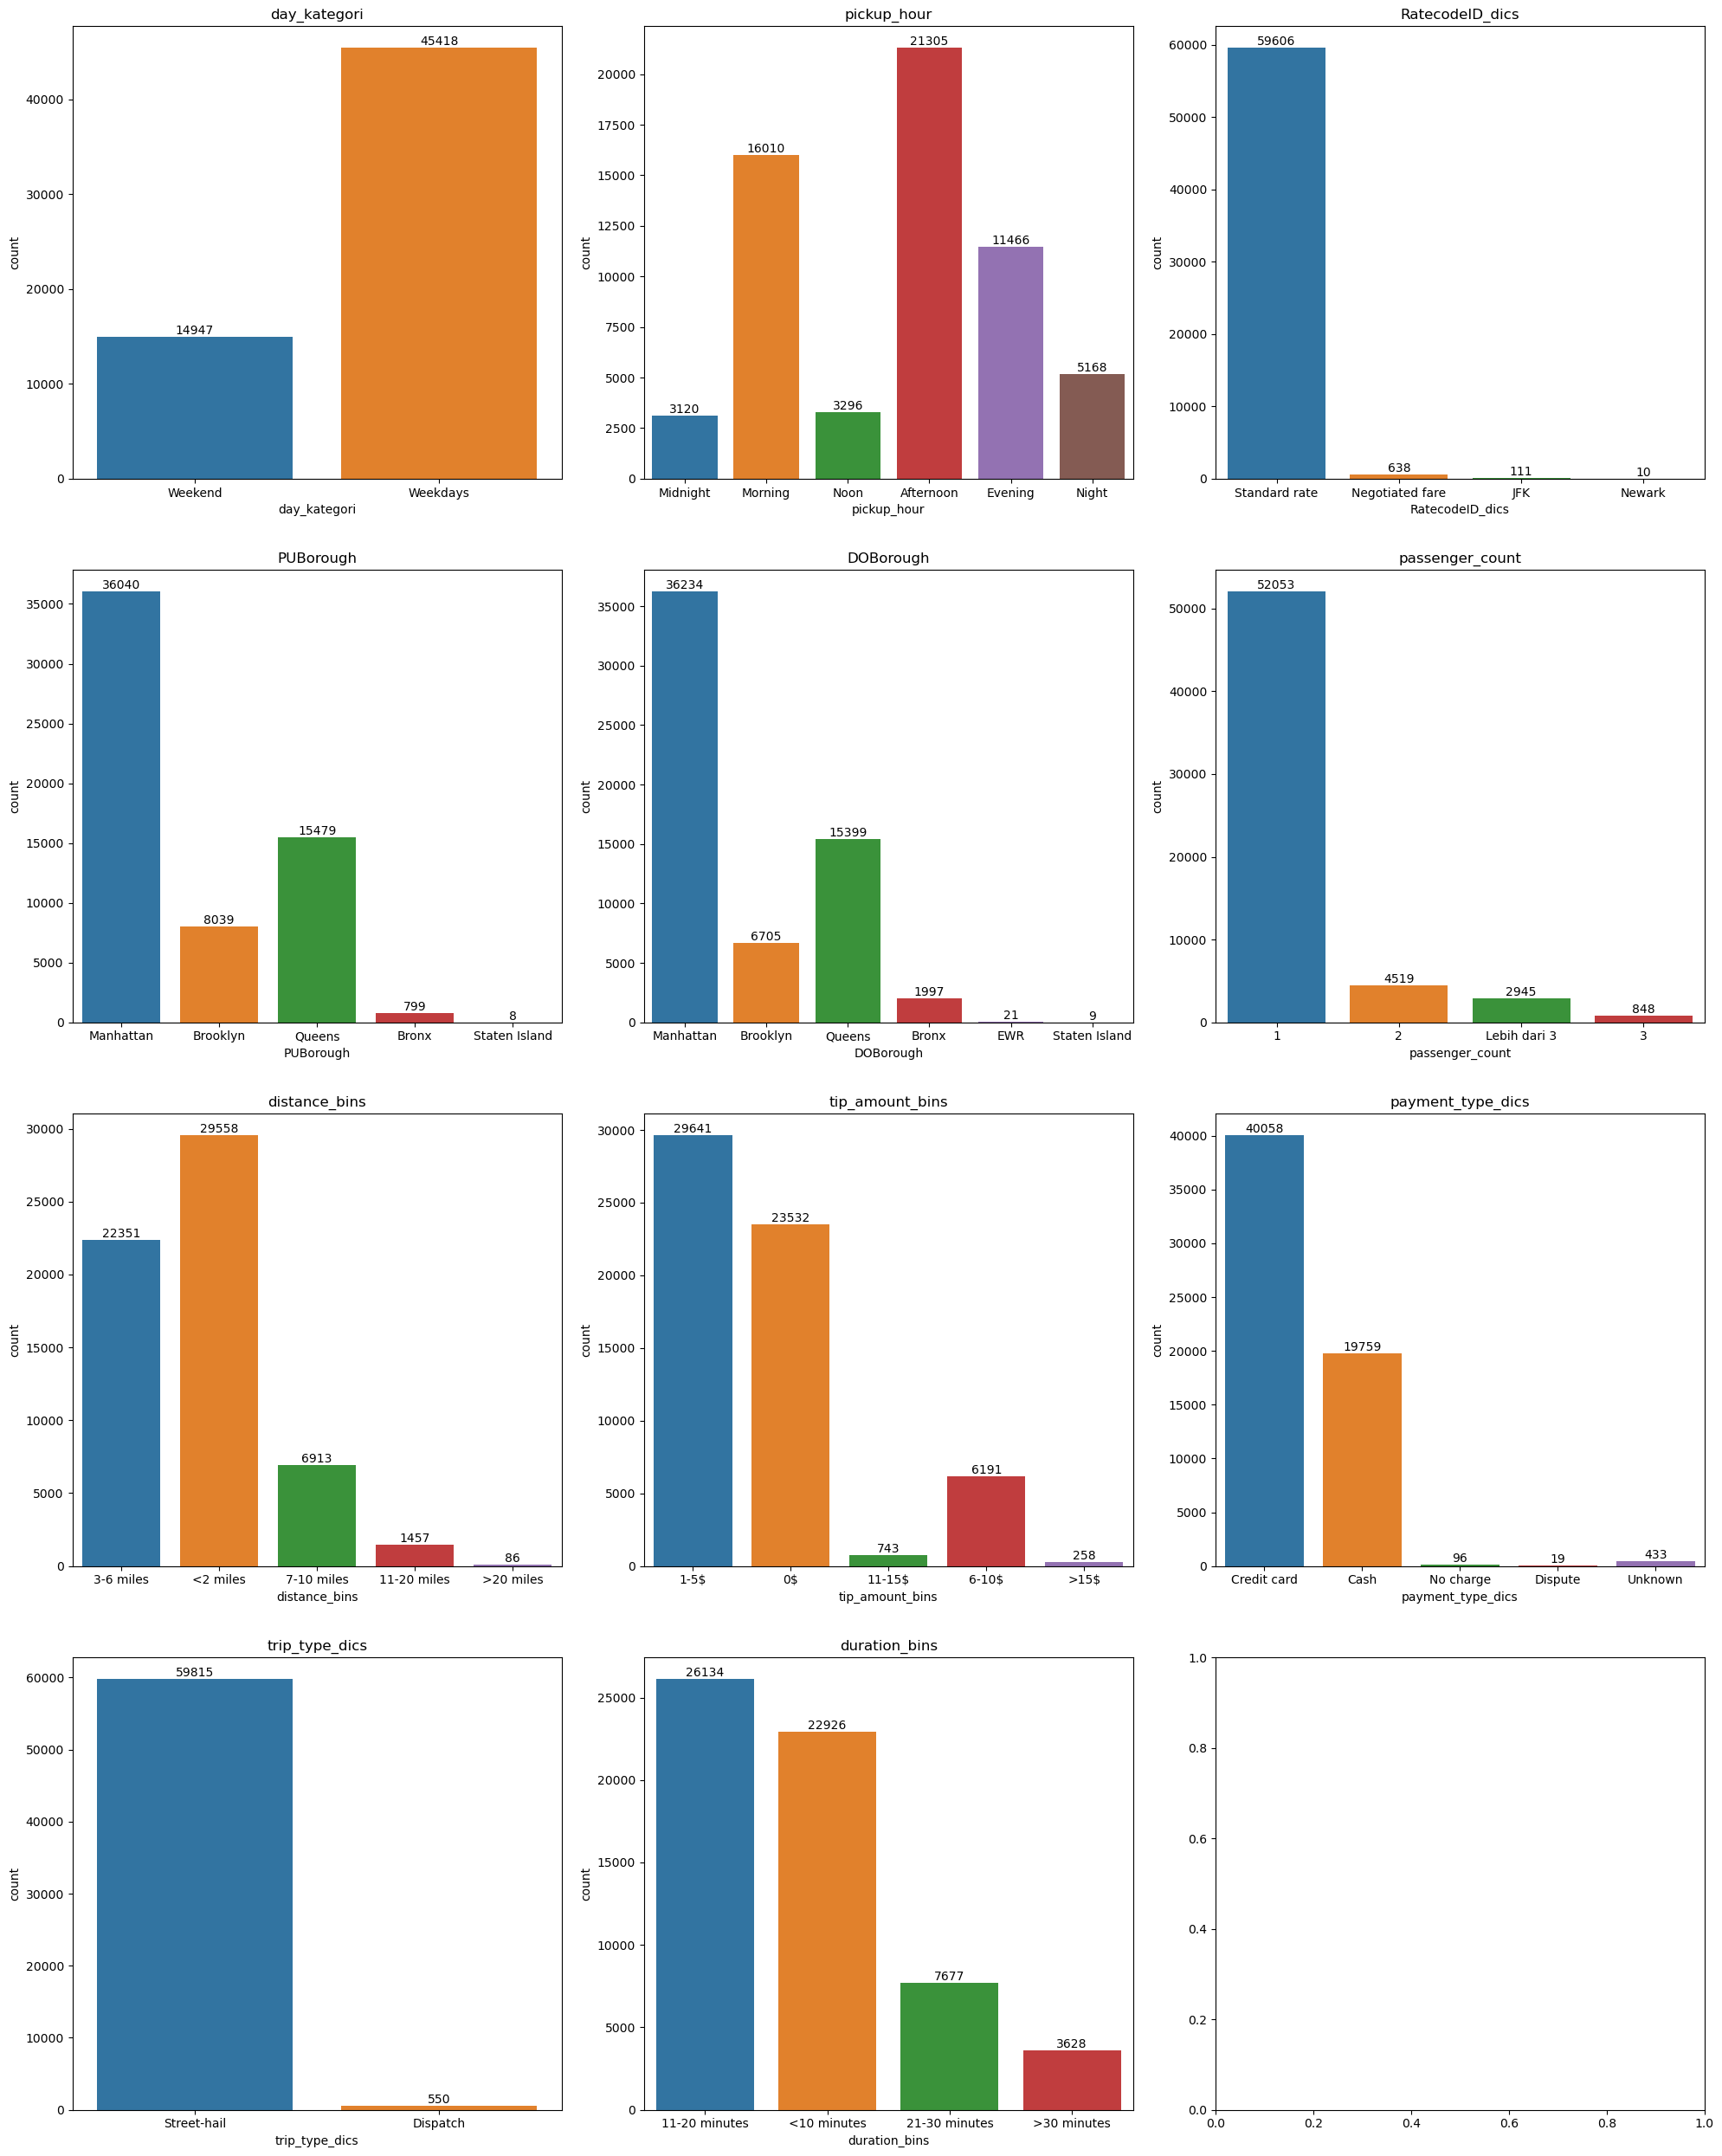

In [72]:
cols = ['day_kategori','pickup_hour', 'RatecodeID_dics', 'PUBorough', 'DOBorough', 'passenger_count', 'distance_bins', 'tip_amount_bins', 'payment_type_dics', 'trip_type_dics', 'duration_bins']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 25))
axs = axs.flatten()

for i, col in enumerate(cols):
    bars = sns.countplot(data=df, x=col, ax=axs[i],palette=color)
    axs[i].set_title(col)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[i].text(x_value, y_value, label, ha='center', va='bottom') 

plt.tight_layout(w_pad=1, h_pad=3)
plt.show()

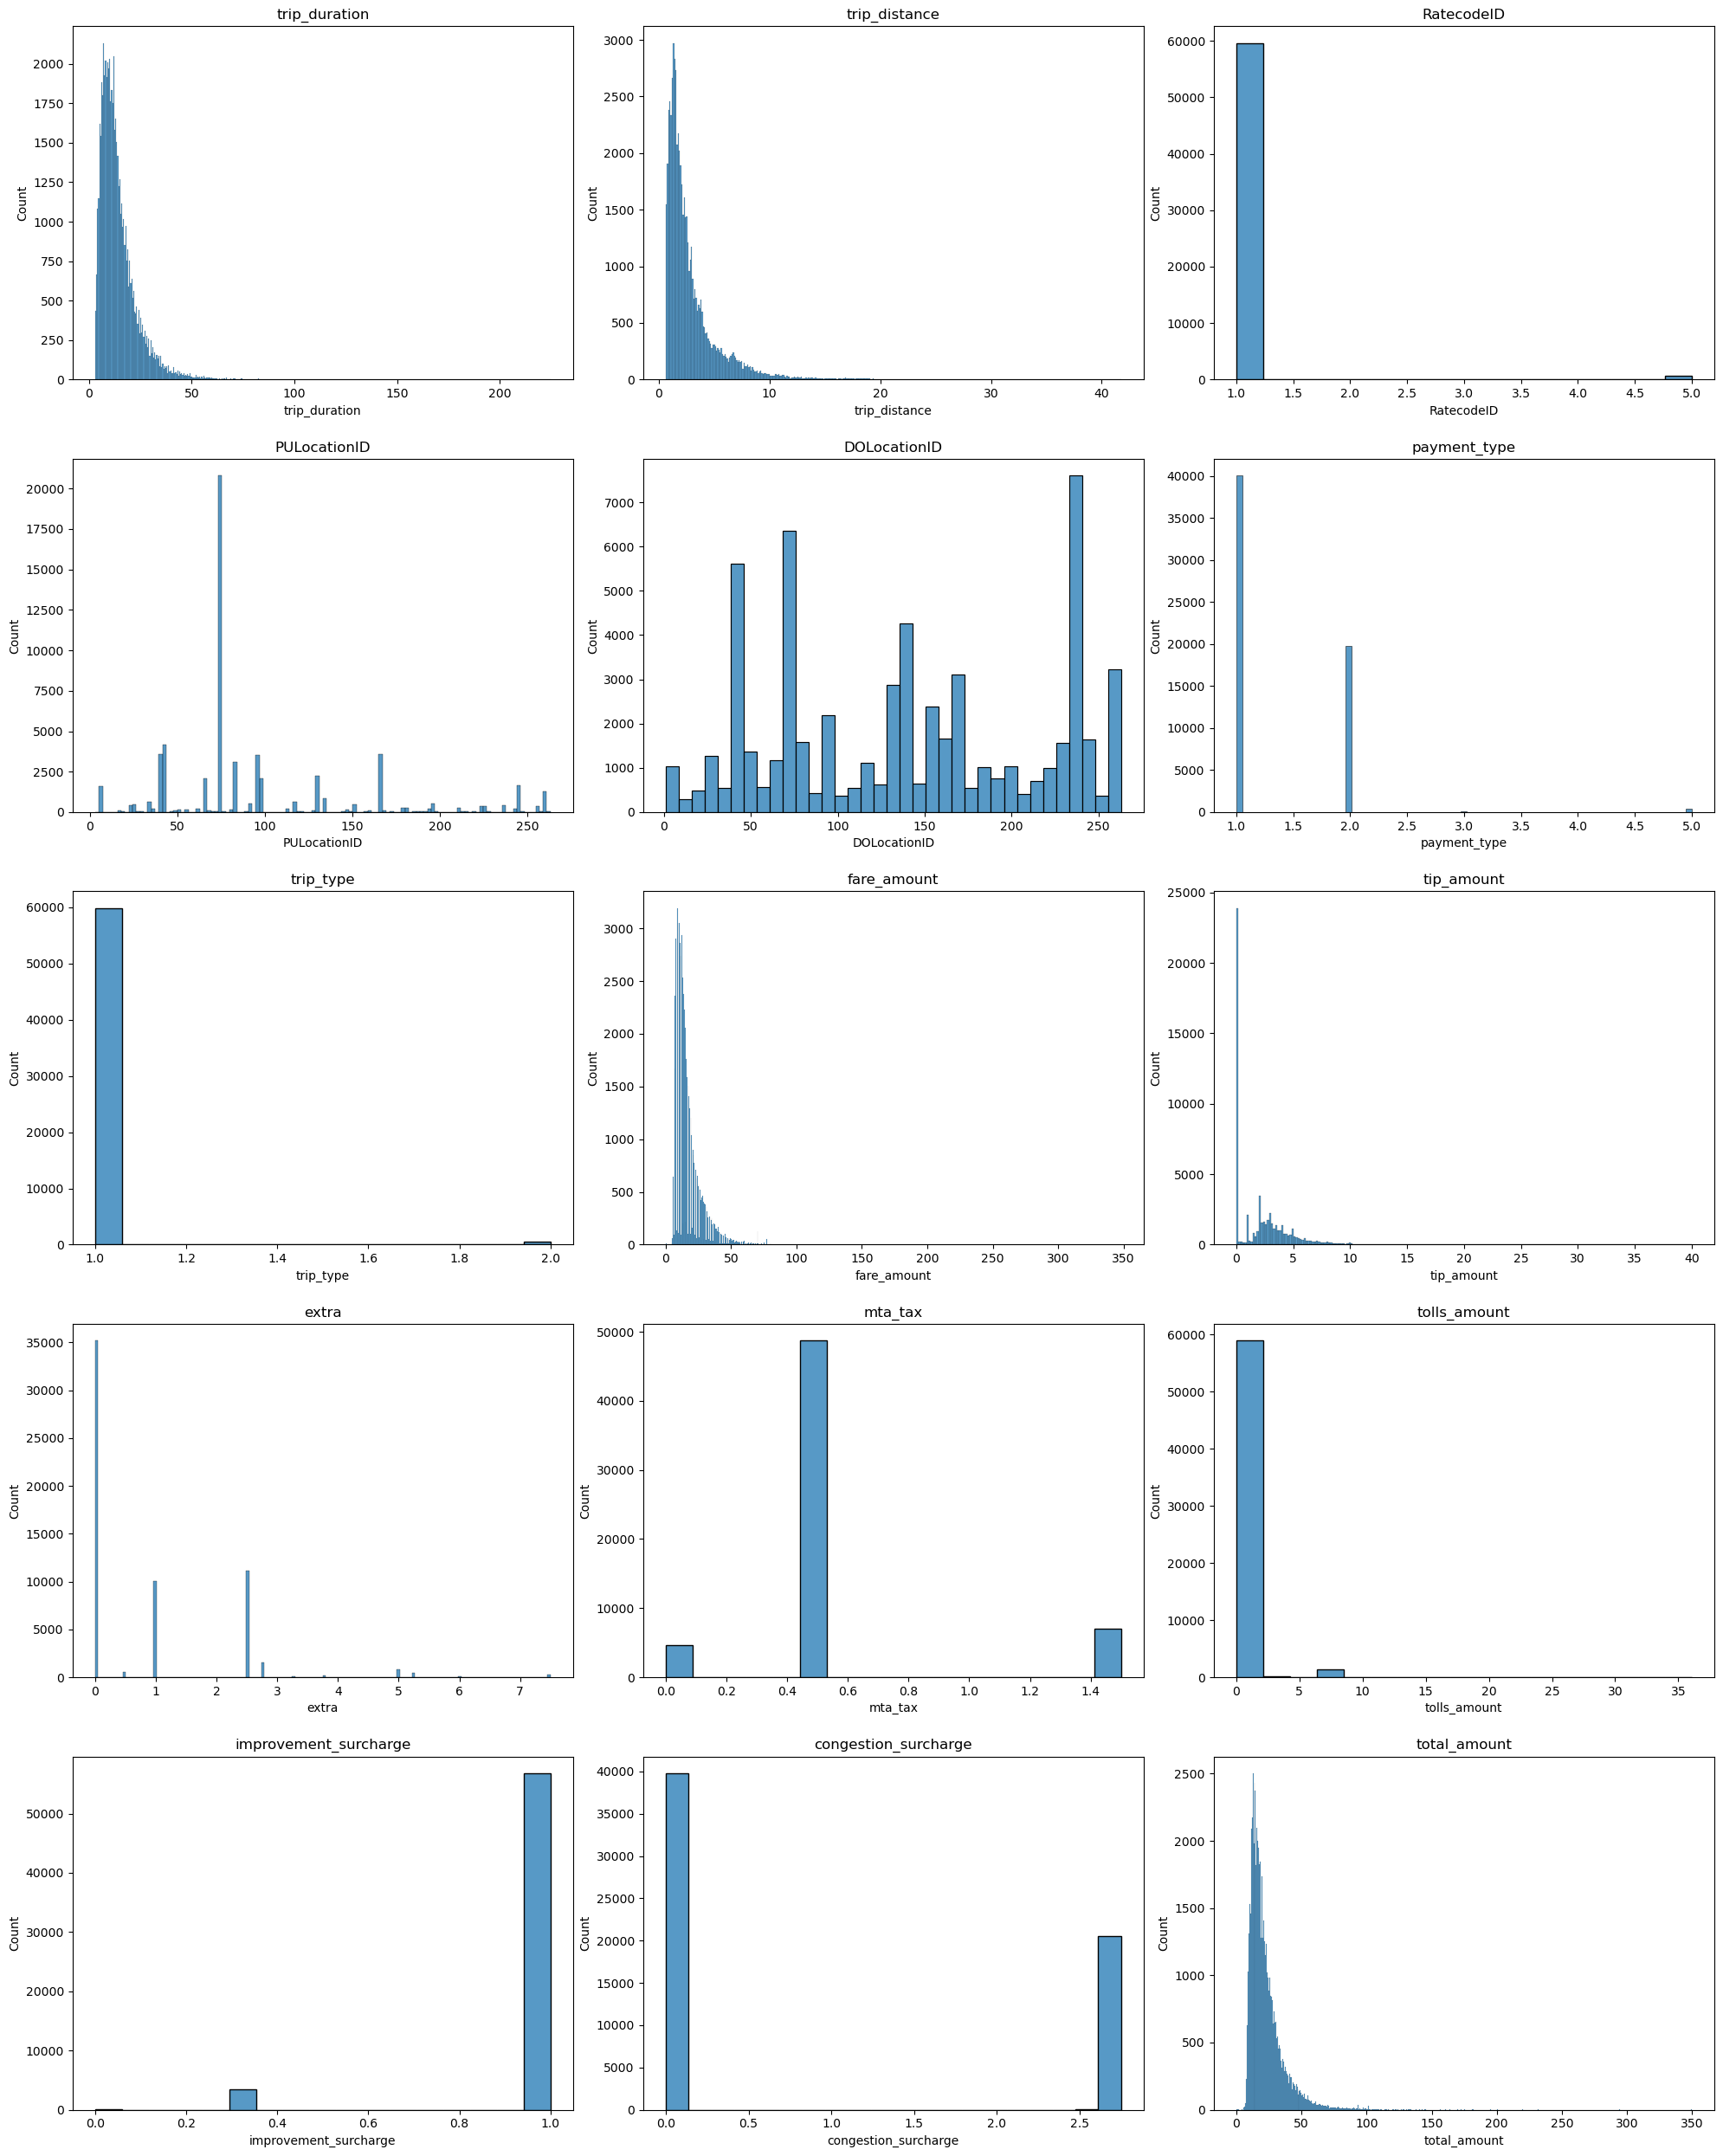

In [73]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20,25))
i = 0
axs = axs.flatten()
for j, k in df.select_dtypes(include=[np.number]).items():
    axs[i].set_title(j)
    sns.histplot(x=df[j], ax=axs[i])
    i += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

**Insight**
- trip_duration, trip_distance, fare_amount, total_amount skwed kanan. Ini menandakan nilai berada di rentang tertentu.
- Terlihat data terdistribusi tidak normal.

### **Total Trip dan Peak Hour di Bulan Januari 2023**

In [74]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cross = pd.crosstab(index=df['lpep_pickup_datetime'].dt.day_name(), columns=df['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_order)
cross.columns.name = None
cross.index.name = 'Day of Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sunday,281,263,218,180,136,73,58,95,120,210,...,557,539,506,518,439,378,289,193,157,7407
Monday,108,67,49,64,52,51,133,373,418,478,...,693,702,703,723,546,375,304,215,147,8850
Tuesday,85,50,44,34,21,49,185,527,644,643,...,721,782,775,790,624,453,321,242,161,9979
Wednesday,84,65,27,23,17,43,164,400,506,516,...,648,687,747,728,592,405,279,209,151,8672
Thursday,85,60,41,25,31,51,161,420,502,542,...,656,697,756,793,537,444,308,238,164,9057
Friday,135,81,38,36,28,42,139,427,460,468,...,694,688,707,714,567,416,321,287,249,8860
Saturday,210,175,121,102,84,41,45,105,195,249,...,579,566,508,532,474,418,322,313,298,7540


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1701945801.py:8: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(data=melted_cross,
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1701945801.py:14: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(data=max_trips_data,
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1701945801.py:24: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(data=min_trips_data,


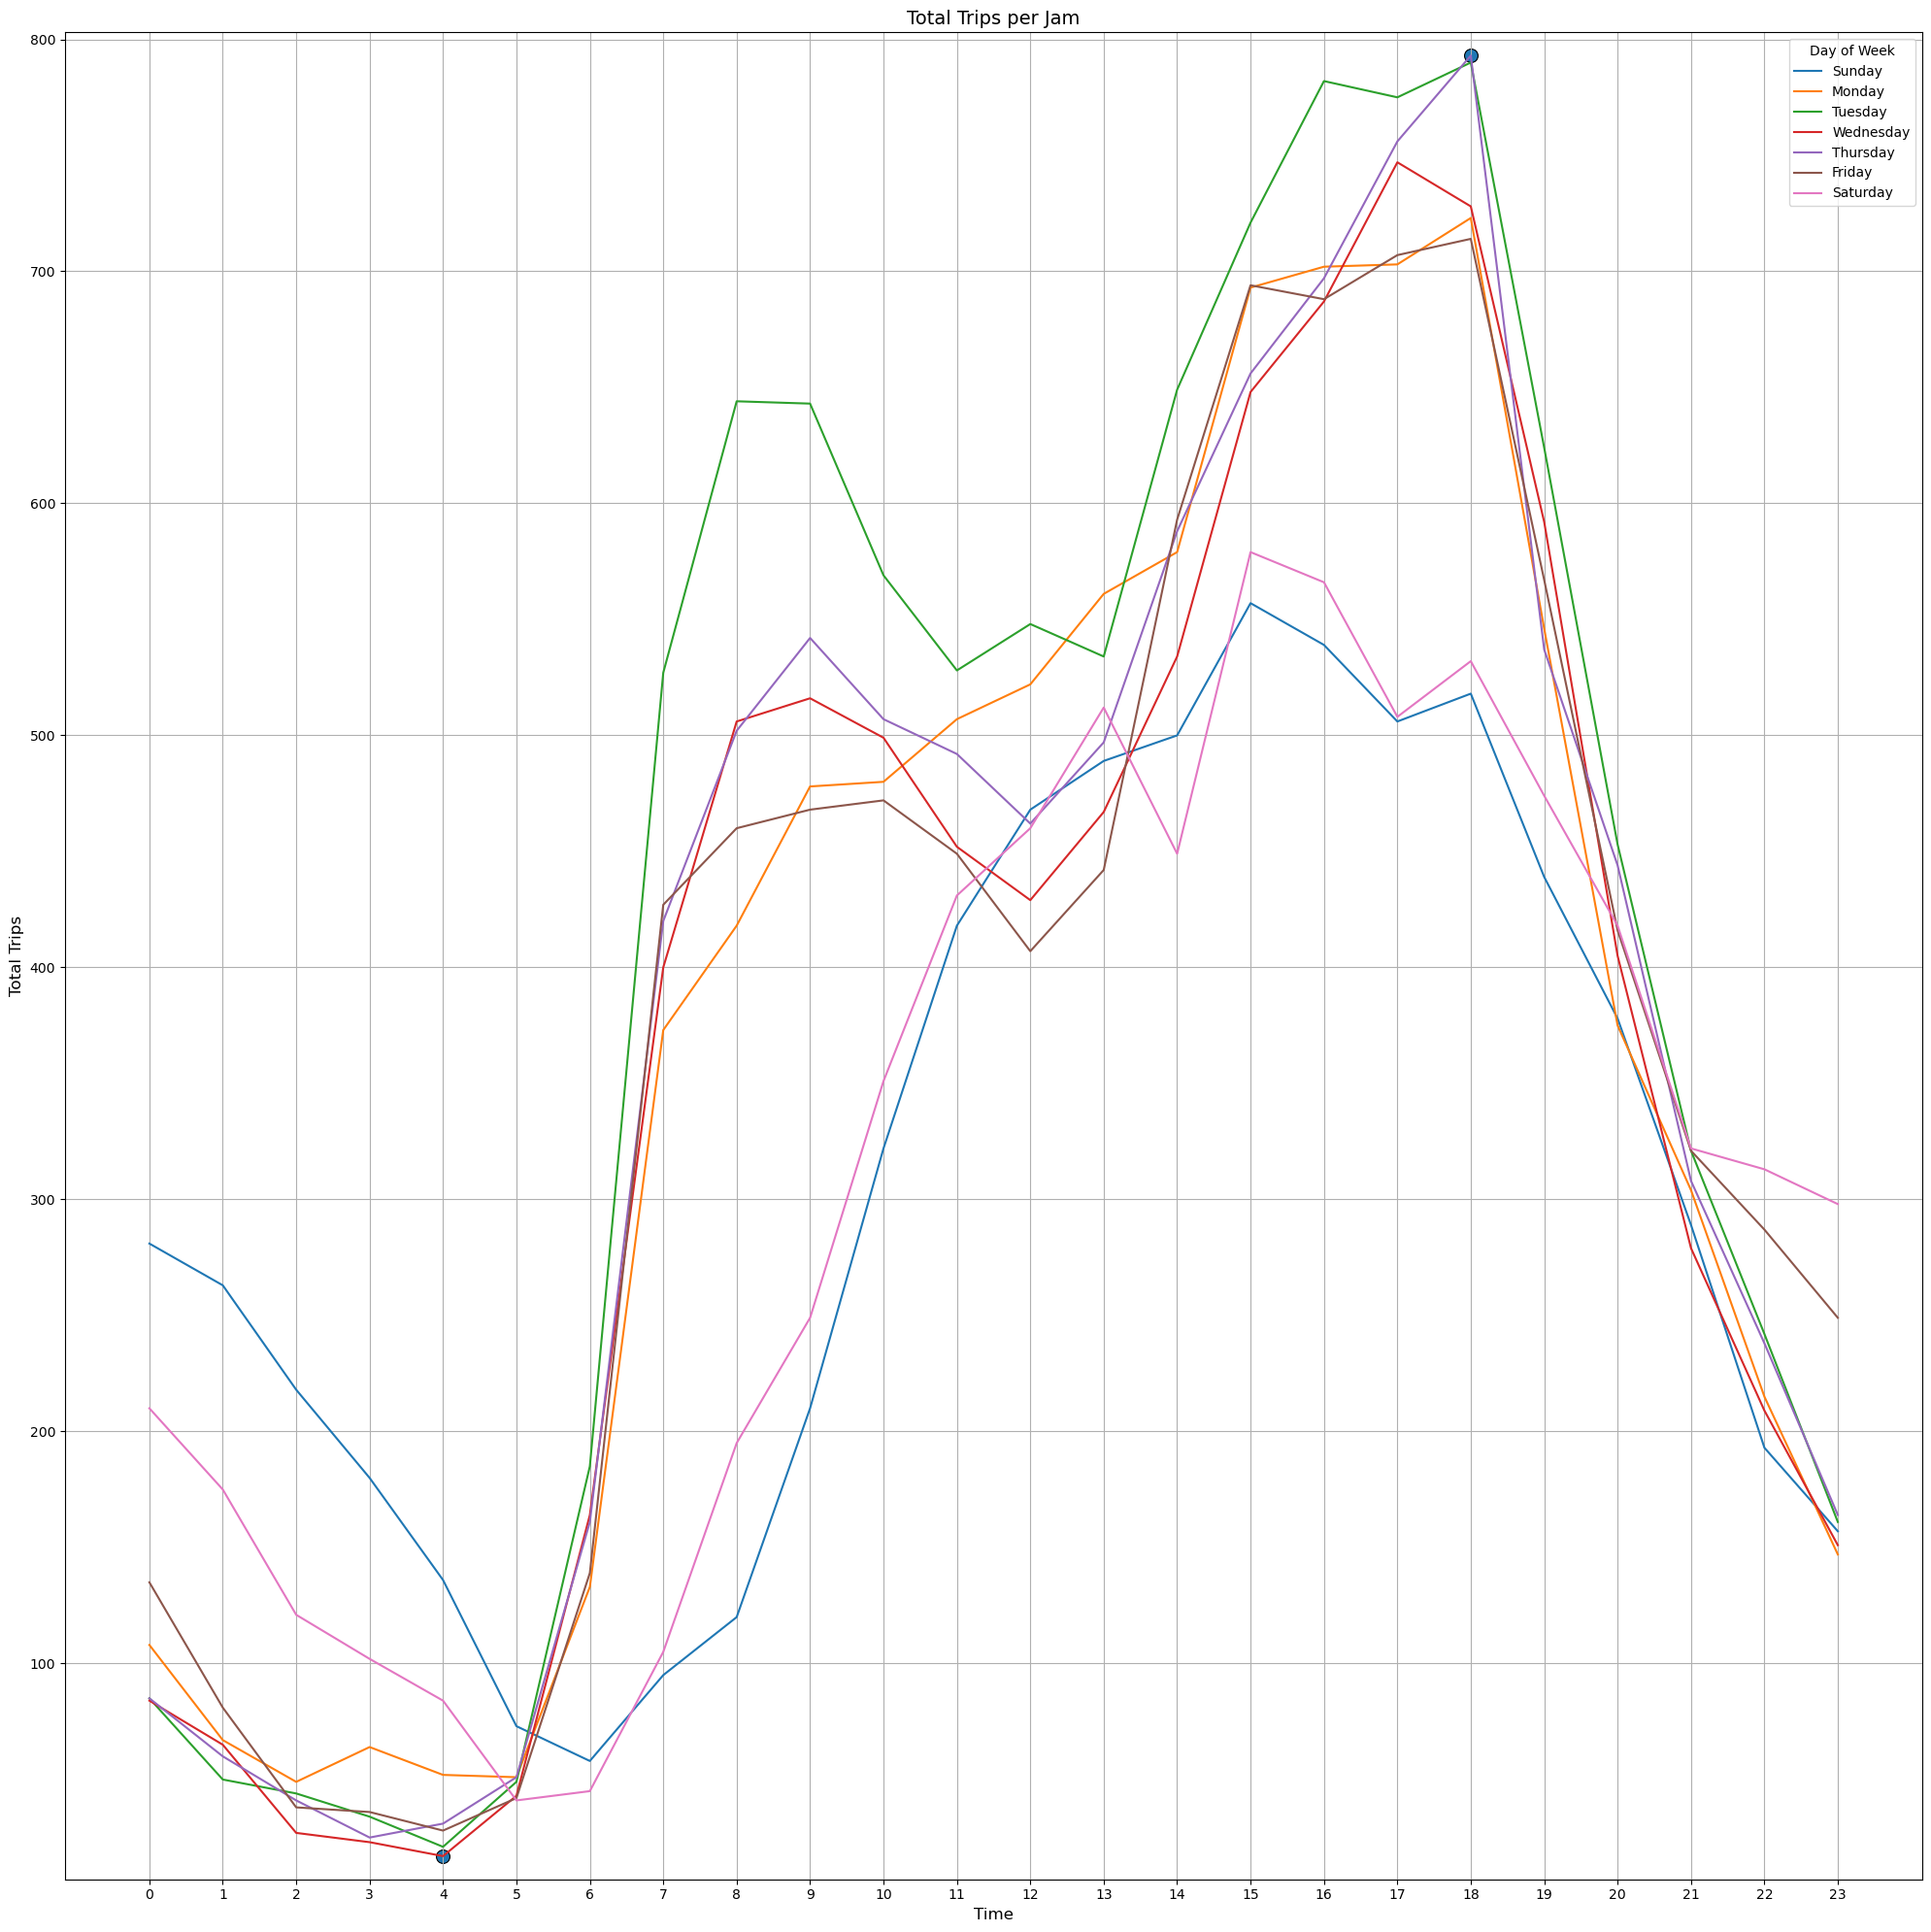

In [75]:
max_trips = melted_cross['trips'].max()
min_trips = melted_cross['trips'].min()

max_trips_data = melted_cross[melted_cross['trips'] == max_trips]
min_trips_data = melted_cross[melted_cross['trips'] == min_trips]

plt.figure(figsize=(20,20))
sns.lineplot(data=melted_cross, 
             x='hour', 
             y='trips', 
             hue='Day of Week', 
             palette=color)

sns.scatterplot(data=max_trips_data,
                x='hour',
                y='trips',
                hue='Day of Week',
                palette=color,
                marker='o', 
                s=100, 
                edgecolor='black', 
                legend=False)

sns.scatterplot(data=min_trips_data,
                x='hour',
                y='trips',
                hue='Day of Week',
                palette=color,
                marker='o',
                s=100, 
                edgecolor='black',
                legend=False)

plt.title('Total Trips per Jam', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)

plt.xticks(np.arange(0, 24, 1))
plt.grid(True)

plt.ylim(min_trips - 10, max_trips + 10)

plt.tight_layout()
plt.show()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\633194374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_trip_counts_sorted,
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\633194374.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  ax = sns.barplot(data=day_trip_counts_sorted,


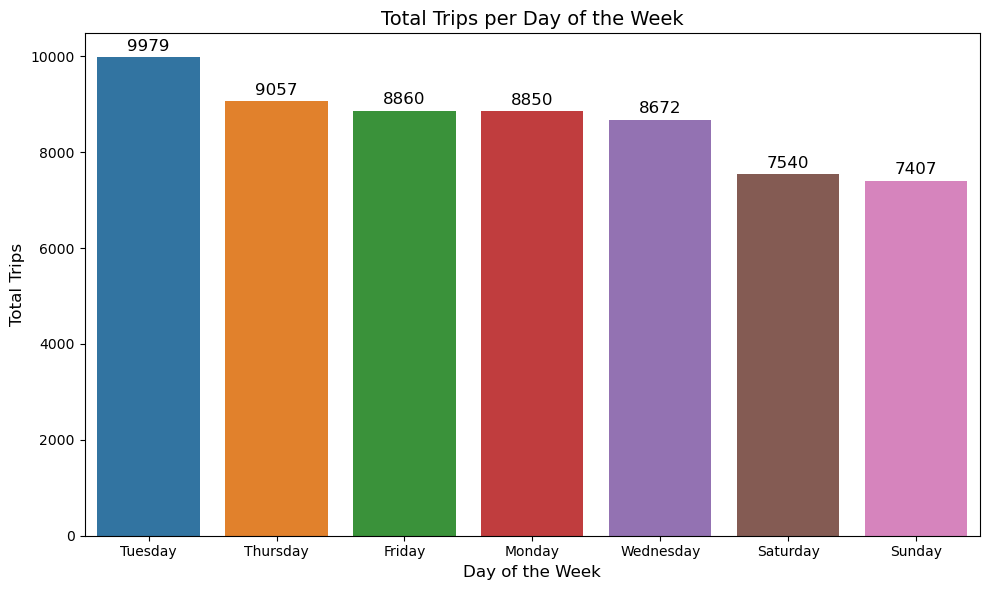

In [76]:
day_trip_counts = melted_cross.groupby('Day of Week')['trips'].sum().reset_index()

day_trip_counts_sorted = day_trip_counts.sort_values(by='trips', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=day_trip_counts_sorted, 
                 x='Day of Week', 
                 y='trips', 
                 palette=color)


plt.title('Total Trips per Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Display the value
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
                ha='center', va='center',  # Center align the label
                fontsize=12, color='black',  # Font size and color
                xytext=(0, 8),  # Vertical offset of the label
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
for i, row in max_trips_data.iterrows():
    print(f"Waktu perjalanan terpadat: {row['trips']} at {row['hour']}.00 on {row['Day of Week']}")

for i, row in min_trips_data.iterrows():
    print(f"Waktu perjalanan terkecil: {row['trips']} at 0{row['hour']}.00 on {row['Day of Week']}")

Waktu perjalanan terpadat: 793 at 18.00 on Thursday
Waktu perjalanan terkecil: 17 at 04.00 on Wednesday


**Insight:**
- Rata-rata perjalanan mulai mengalami peningkatan pada pukul 6 pagi, kemudian mulai menurun sekitar pukul 11-12 siang, dan kembali meningkat mulai pukul 3 sore dengan puncaknya pada pukul 6 sore. Hal ini mungkin berkaitan dengan jam kerja kantor di New York, di mana jam-jam sibuk terjadi pada pagi hari dan sore hari, bisa disimpulakn pola perjalanan komuter(perjalan rutin antara tempat tinggal dan tempat kerja atau sekolah).
- Hari Selasa menunjukkan jumlah perjalanan terbanyak. Mungkin disebabkan banyak perjalanan bisnis yang tiba pada hari Senin dan memulai minggu kerja pada hari Selasa. 
- Aktivitas perjalanan cenderung lebih sedikit pada akhir pekan, yang sesuai dengan kecenderungan orang untuk lebih banyak beristirahat

### **Jumlah Trips berdasrkan Borough(Distrik) dan Pick Up Zone**

In [78]:
agg_borough = df.groupby('PUBorough').agg(count=('PUBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = df.groupby('PUZone').agg(count=('PUZone', 'count')).sort_values(by='count', ascending=False).reset_index()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2858210625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=agg_borough['PUBorough'],
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2858210625.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  bars = sns.barplot(x=agg_borough['PUBorough'],
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2858210625.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=agg_zone.head(10),


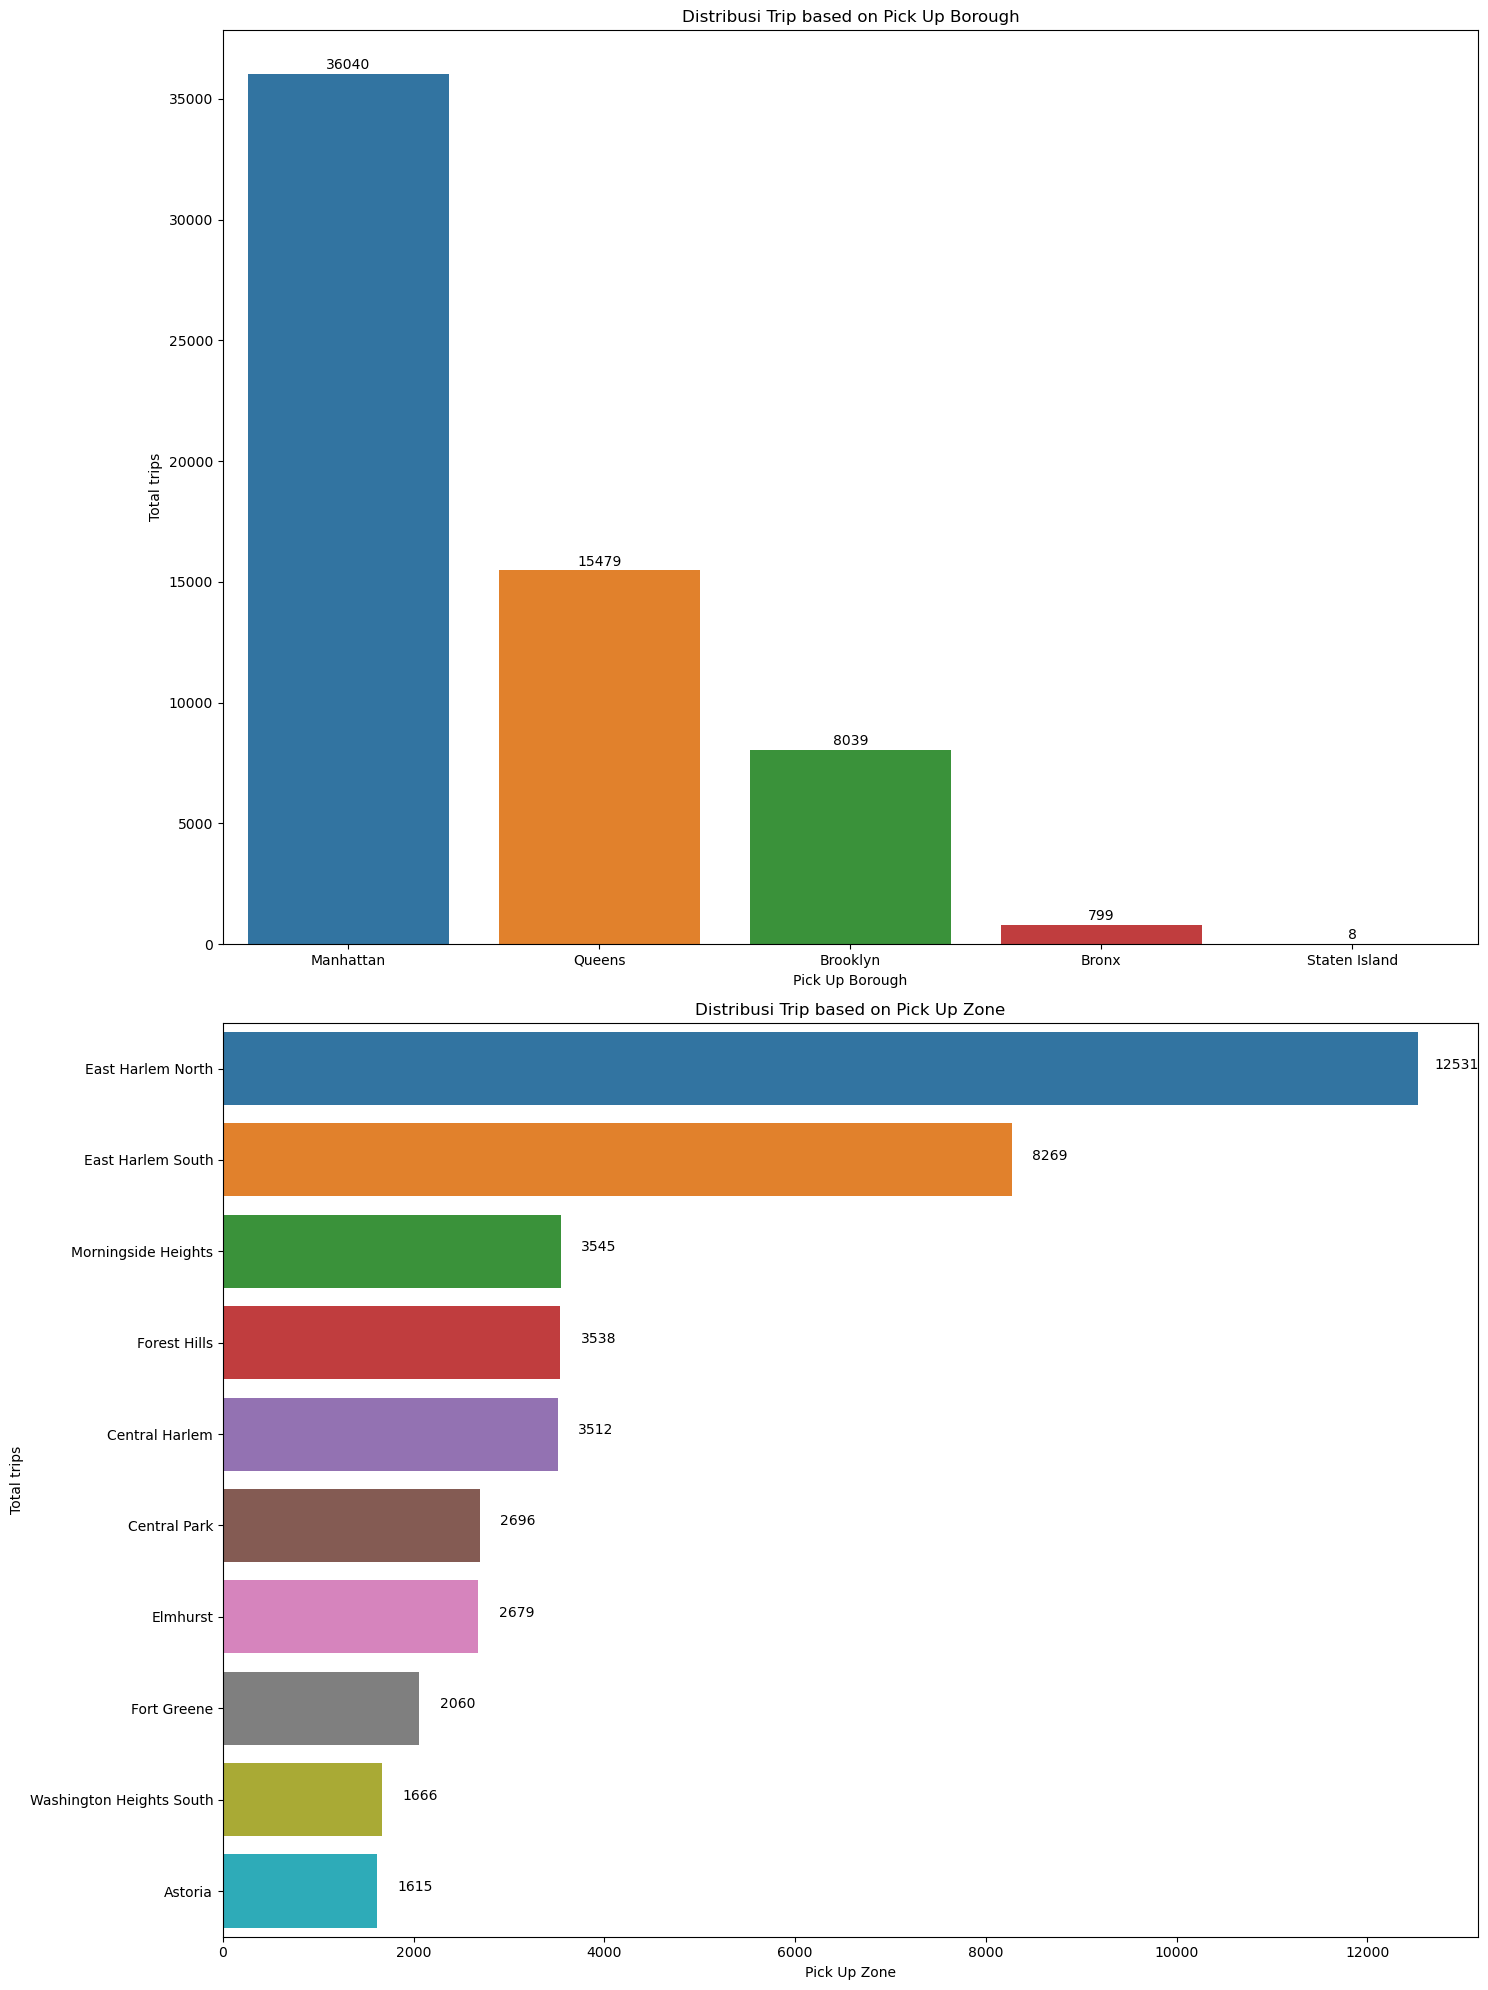

In [79]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
bars = sns.barplot(x=agg_borough['PUBorough'], 
                   y=agg_borough['count'], 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Distribusi Trip based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(2,1,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PUZone', 
                   x='count', 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Distribusi Trip based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

In [80]:
agg_borough_do = df.groupby('DOBorough').agg(count=('DOBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone_do = df.groupby('DOZone').agg(count=('DOZone', 'count')).sort_values(by='count', ascending=False).reset_index()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3684152956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=agg_borough_do['DOBorough'],
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3684152956.py:4: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  bars = sns.barplot(x=agg_borough_do['DOBorough'],
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3684152956.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=agg_zone_do.head(10),


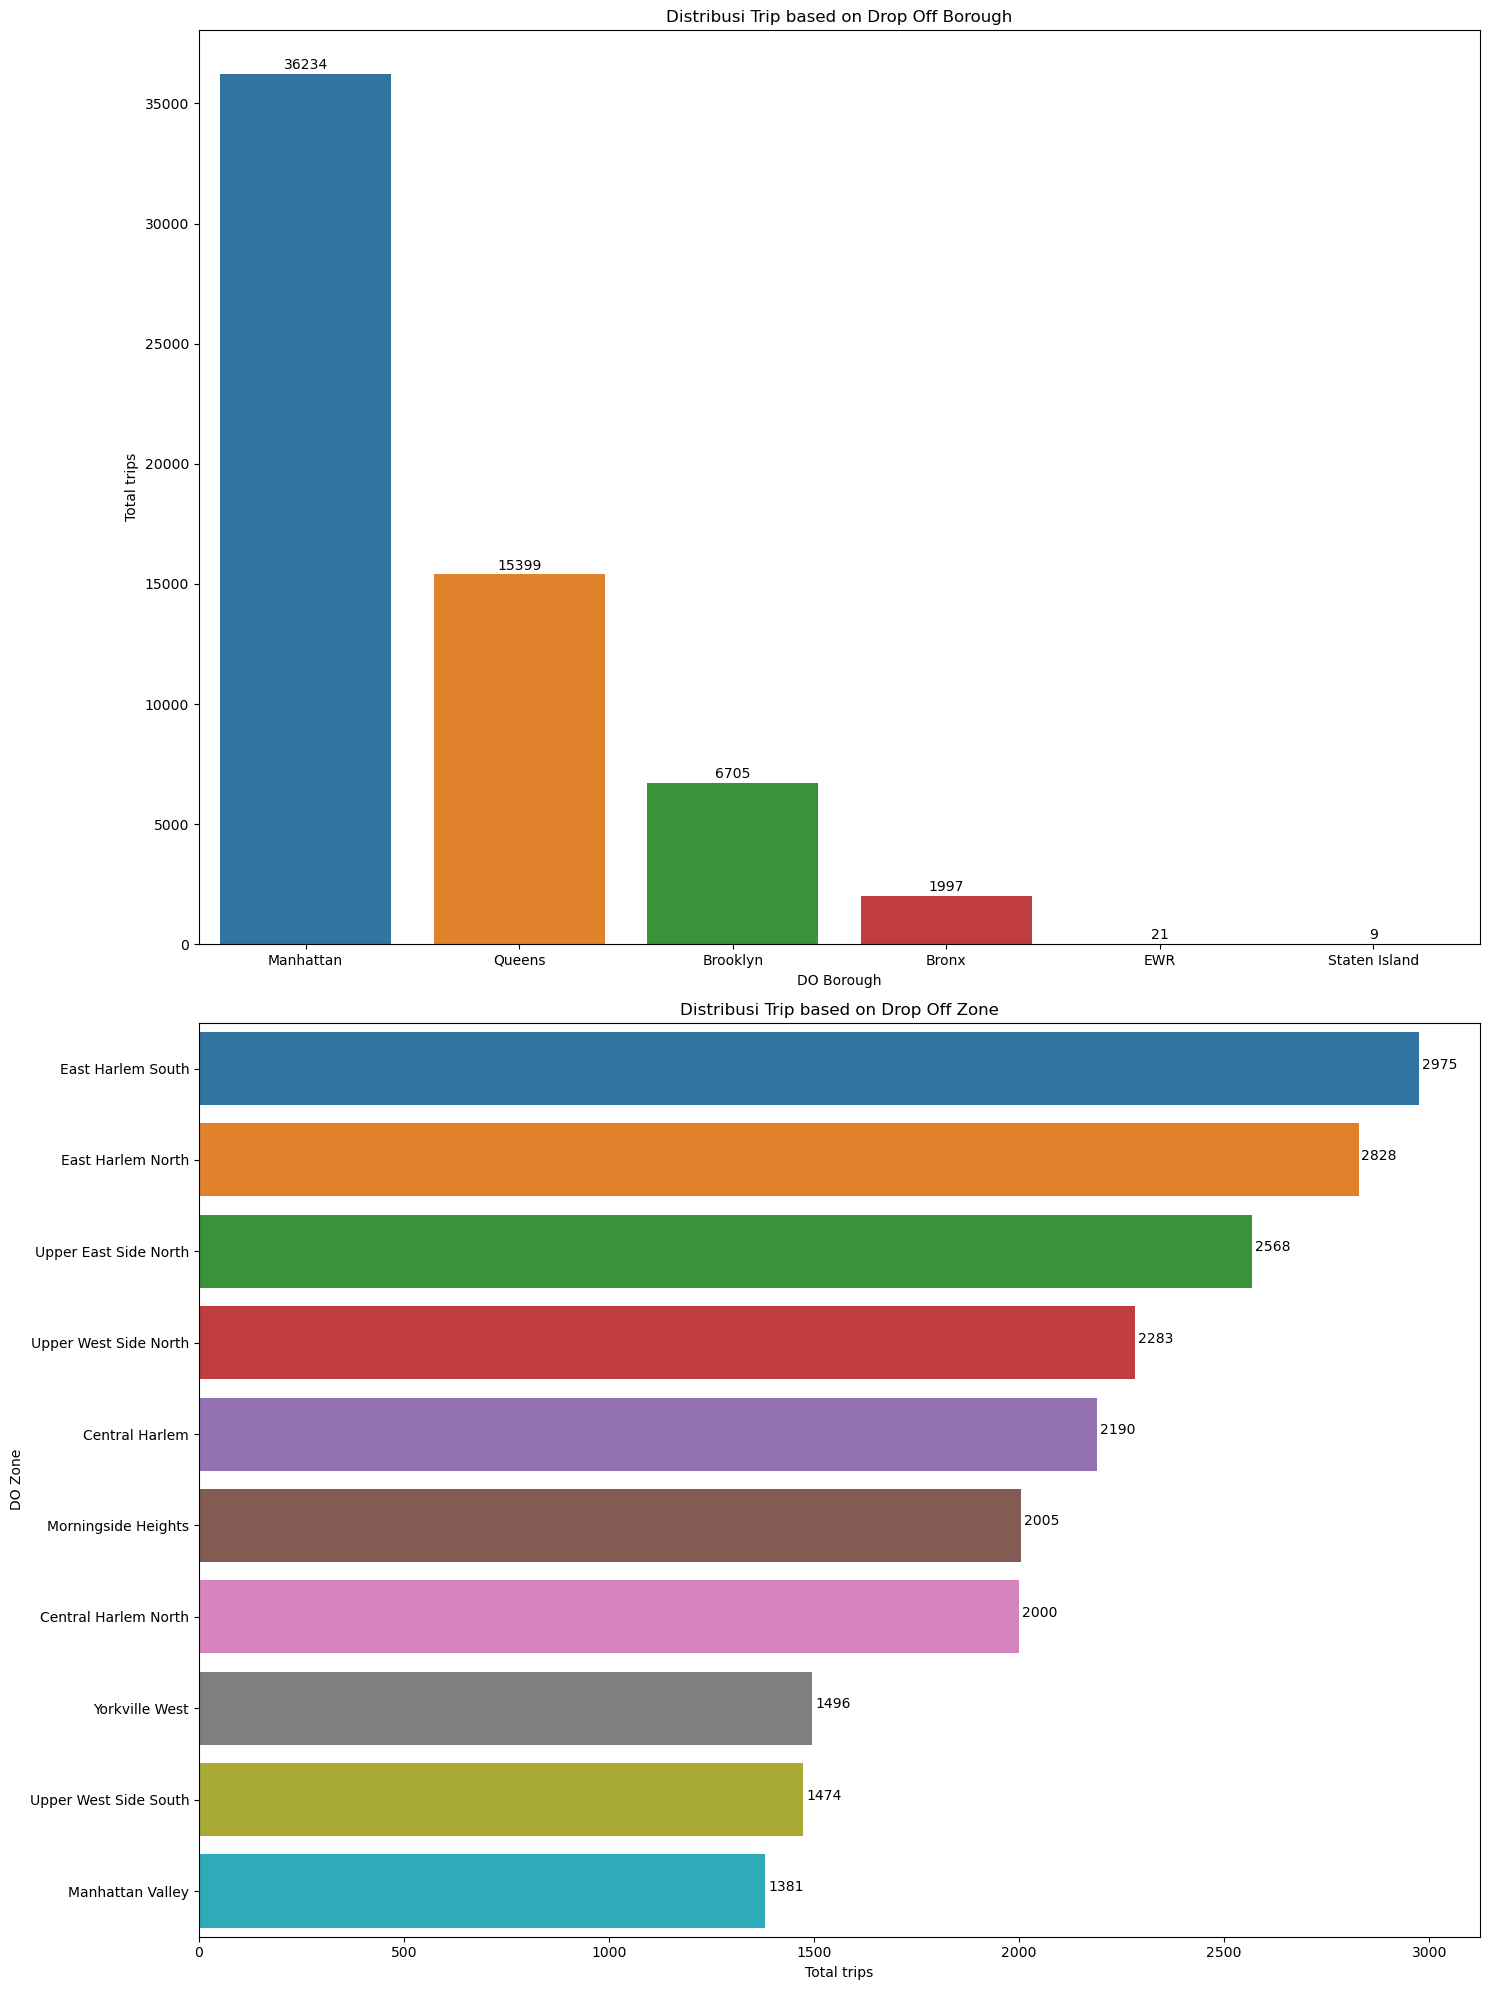

In [81]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
bars = sns.barplot(x=agg_borough_do['DOBorough'], 
                   y=agg_borough_do['count'], 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough_do['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Distribusi Trip based on Drop Off Borough')
plt.xlabel('DO Borough')
plt.ylabel('Total trips')

plt.subplot(2,1,2)
bars = sns.barplot(data=agg_zone_do.head(10),
                   y='DOZone', 
                   x='count', 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 50
    label = "{:.0f}".format(agg_zone_do['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Distribusi Trip based on Drop Off Zone')
plt.ylabel('DO Zone')
plt.xlabel('Total trips')

plt.tight_layout()
plt.show()

**Insight**
- Trip terbanyak berasal dari pickup zone dan drop zone di daerah Manhattan, khususnya di East Harlem North dan South. Harlem dikenal dengan opsi apartemen yang lebih terjangkau dibandingkan dengan bagian Manhattan lainnya, yang membuat banyak orang yang bekerja di Manhattan mencari hunian dengan biaya lebih rendah di kawasan ini. Hal ini menyebabkan tingginya volume perjalanan dari dan menuju kawasan East Harlem Nort dan South.

### **Rata-rata Jumlah Tip berdasarkan Drop Off Zone**

In [82]:
do_loc_tip = df.groupby('DOZone').agg(count=('tip_amount', 'count'), 
                                     total_tip=('tip_amount', 'sum'), 
                                     median_tip=('tip_amount', 'median'), )

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2795544654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars= sns.barplot(data=data,


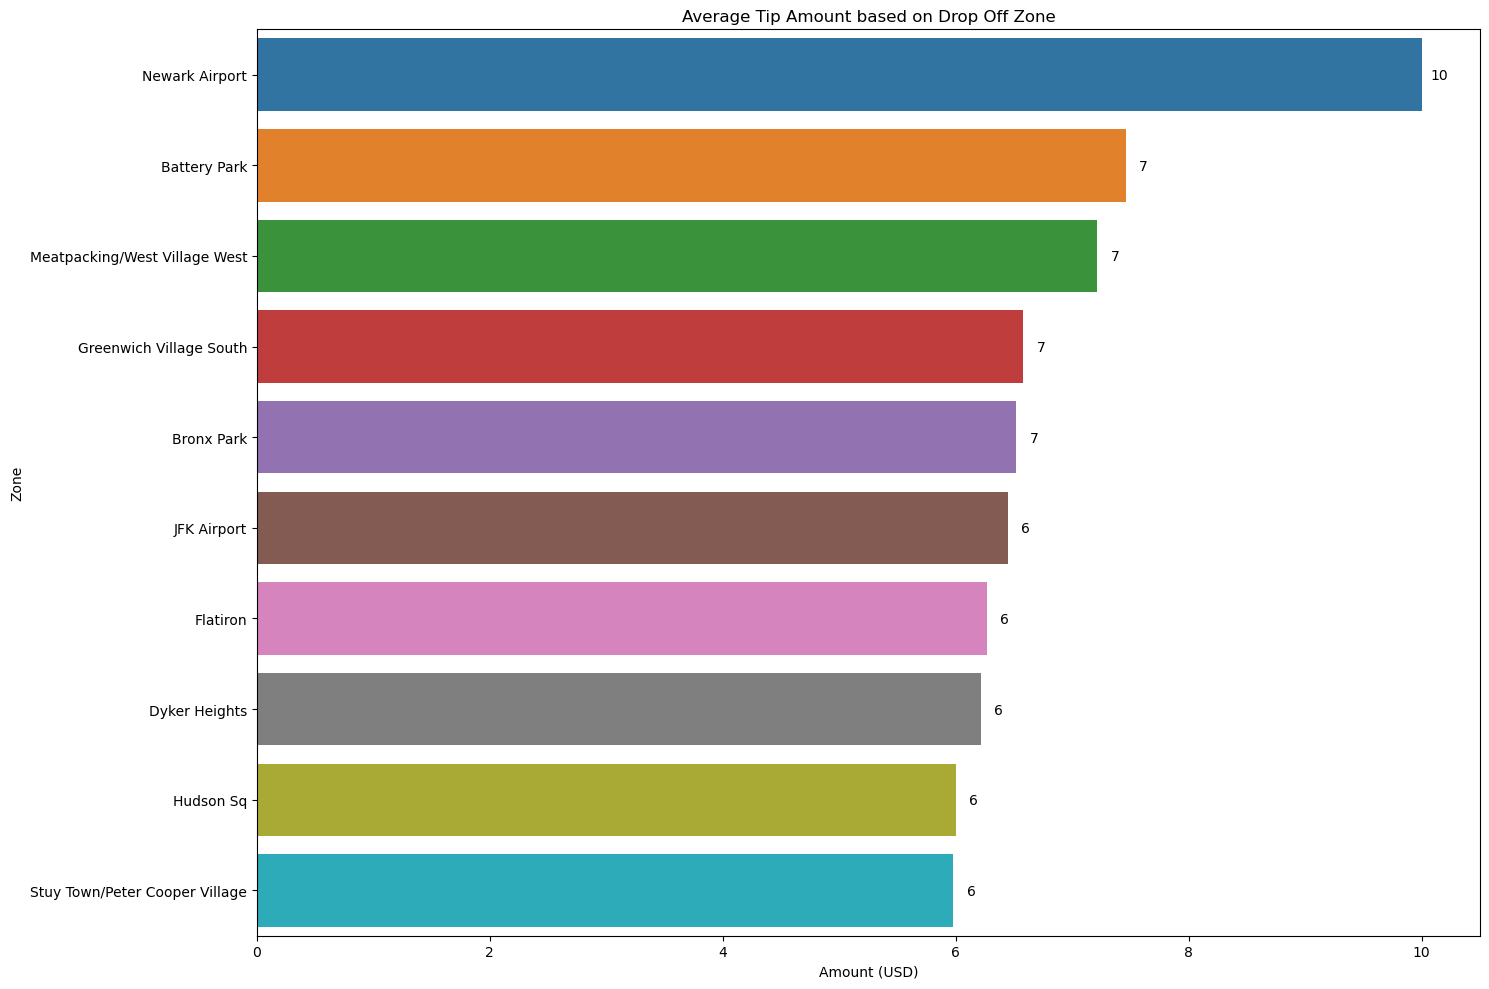

In [83]:
plt.figure(figsize=(15,10))
data = do_loc_tip[do_loc_tip['count']>1].sort_values(by='median_tip', ascending=False).head(10).reset_index()
bars= sns.barplot(data=data,
            x='median_tip',
            y='DOZone', 
            palette=color)
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2 + 0.05
    x_value = bar.get_width() + 0.15
    label = "{:.0f}".format(data['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Tip Amount based on Drop Off Zone')
plt.xlabel('Amount (USD)')
plt.ylabel('Zone')

plt.tight_layout()
plt.show()

**Insight**
- Newark Airport memiliki rata-rata jumlah tip tertinggi, yaitu sekitar $10. Hal ini menunjukkan bahwa perjalanan menuju Newark Airport seringkali menghasilkan tip yang lebih besar dibandingkan zona lainnya.
- Rata-rata tip yang tinggi ini kemungkinan besar disebabkan oleh jarak perjalanan yang lebih jauh ke Newark Airport dibandingkan tujuan lain, yang membuat penumpang lebih cenderung memberikan tip lebih besar.

### **Metode Pembayaran**

In [109]:
agg_payment = df.groupby('payment_type_dics').agg(count=('payment_type_dics', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_payment = agg_payment.groupby('payment_type_dics').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1091920896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=agg_payment['payment_type_dics'],
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\1091920896.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  bars = sns.barplot(x=agg_payment['payment_type_dics'],


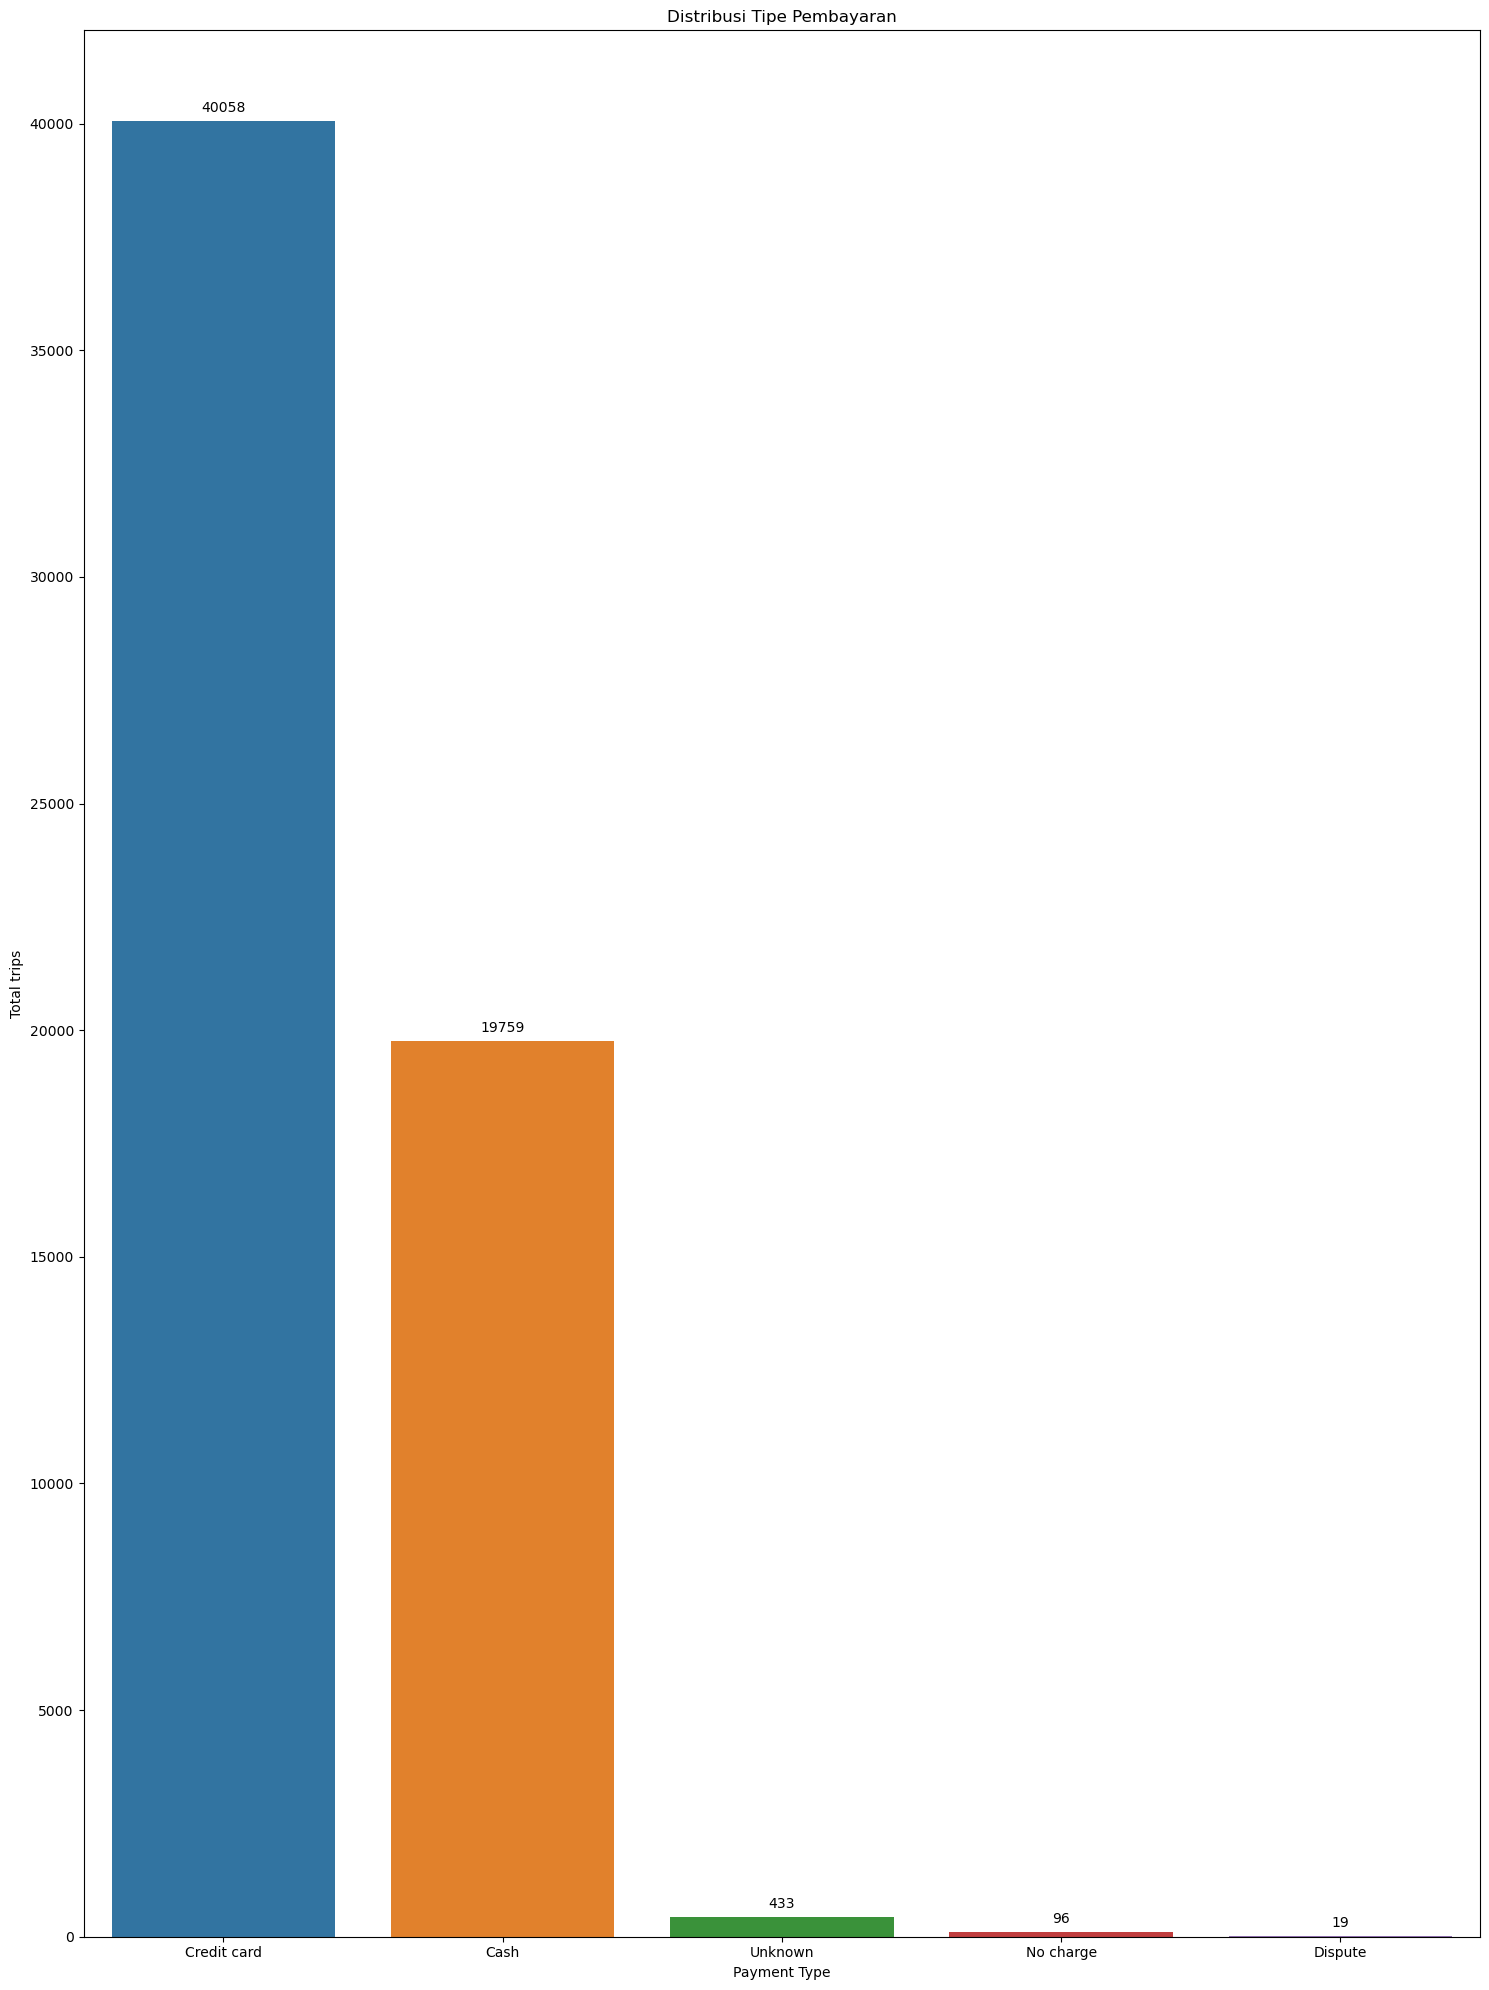

In [111]:
plt.figure(figsize=(15,20))

bars = sns.barplot(x=agg_payment['payment_type_dics'], 
                   y=agg_payment['count'], 
                   palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_payment['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Distribusi Tipe Pembayaran')
plt.xlabel('Payment Type')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

**Insight**
- Mayoritas transaksi menggunakan kartu kredit, yang menunjukkan bahwa banyak pelanggan lebih memilih untuk menggunakan metode pembayaran elektronik. Kartu kredit/pembayaran elektronik biasanya dianggap lebih praktis.

### **Melihat korelasi Tip_Amount**

In [116]:
df_tip_corr = df[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'fare_amount', 'tip_amount']][df['tip_amount']>0]
df_tip_corr.head()

,PULocationID,DOLocationID,trip_distance,trip_duration,fare_amount,tip_amount
0,166,143,2.58,11.02,14.9,4.03
1,24,43,1.81,6.77,10.7,2.64
2,41,238,1.30,5.82,6.5,1.70
5,181,45,3.80,17.42,19.1,4.85
7,41,166,1.11,4.95,7.2,1.00


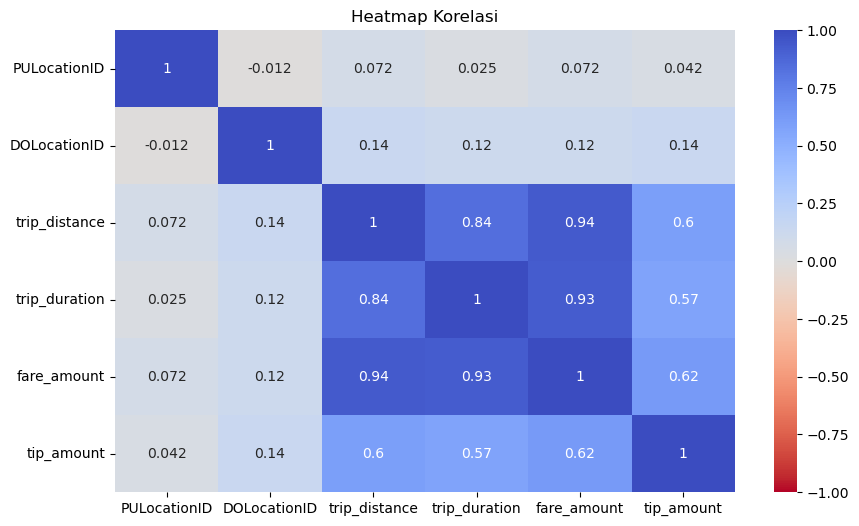

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(df_tip_corr.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm_r')
plt.title("Heatmap Korelasi")
plt.show()

- tip_amount dan fare_amount (0.62) : menunjukkan hubungan positif sedang,dapat diartikan bahwa semakin tinggi fare_amount semakin besar kemungkinan untuk mendapatkan jumlah tip yang lebih tinggi.
- tip_amount dan trip_distance(0.6) : menunjukkan hubungan positif sedang, dapat diartikan bahwa semakin tinggi trip_distance semakin besar kemungkinan untuk mendapatkan jumlah tip yang lebih tinggi.
- tip amount dan trip_duration (0.57) : menunjukkan hubungan positif sedang dapat diartikan bahwa semakin tinggi trip_duration semakin besar kemungkinan untuk mendapatkan jumlah tip yang lebih tinggi.

### **Weekend vs Weekdays**?

In [86]:
daycat_tip = df[df['tip_amount']>0][['day_kategori', 'tip_amount']]
data_tip_daycat = (
    daycat_tip.groupby('day_kategori')  # kelompokkan data berdasarkan kategori hari
    .agg(
        count=('tip_amount', 'count'),      # Hitung jumlah tip
        avg_tip=('tip_amount', 'mean'),    # Hitung rata-rata tip
        median_tip=('tip_amount', 'median')  # Hitung median tip
    )
    .round(2) 
    .reset_index()  # reset index untuk membuat day_kategori sebagai kolom biasa
)
data_tip_daycat

,day_kategori,count,avg_tip,median_tip
0,Weekdays,27668,3.69,3.06
1,Weekend,9165,3.77,3.12


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3151565584.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=data_tip_daycat, x='day_kategori', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3151565584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=data_tip_daycat, x='day_kategori', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3151565584.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  bars = sns.barplot(data=data_tip_daycat, x='day_kategori', y='median_tip', ci=0, palette=color)


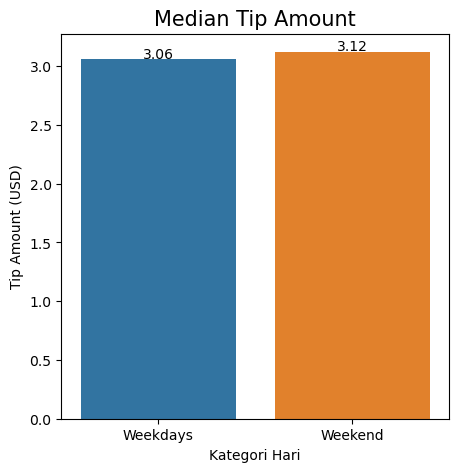

In [87]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=data_tip_daycat, x='day_kategori', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.01
    label = "{:.2f}".format(data_tip_daycat['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Kategori Hari')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Uji Mann-Whitney U**<br>
Mann-Whitney U menguji apakah kedua kelompok memiliki distribusi yang berbeda.<br>
- H0 : Tidak ada perbedaan median antara tip_amount pada weekend dan weekdays
- H1 : Ada perbedaan median antara tip_amount pada weekend dan weekdays.

In [88]:
from scipy.stats import mannwhitneyu

stat, p_value= mannwhitneyu(
    daycat_tip[daycat_tip['day_kategori'] == 'Weekend']['tip_amount'].sample(100, random_state=0),
    daycat_tip[daycat_tip['day_kategori'] == 'Weekdays']['tip_amount'].sample(100, random_state=0),
    alternative='two-sided'
)

print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
    print("Tolak H0, ada perbedaan median tip amount antara weekend dan weekdays.")
else:
    print("Gagal menolak H0, tidak ada perbedaan median tip amount antara weekend dan weekdays.")

p-value 0.9133987316389187
Gagal menolak H0, tidak ada perbedaan median tip amount antara weekend dan weekdays.


**Kesimpulan** : tidak ada perbedaan signifikan antara jumlah tip yang diberikan di weekend dan weekdays.  Hasil ini menunjukkan bahwa hari weekend maupun weekdays tidak terlalu berpengaruh terhadap jumlah tip.

### **Pick Up Times**

In [89]:
tip_putime_corr = df[df['tip_amount']>0][['pickup_hour', 'tip_amount']]
tip_putime= tip_putime_corr.groupby('pickup_hour').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_putime

,pickup_hour,count,avg_tip,median_tip
0,Afternoon,12616,3.79,3.21
1,Evening,7515,3.57,3.08
2,Midnight,1681,4.10,3.25
3,Morning,9934,3.67,3.00
4,Night,3210,3.62,3.00
5,Noon,1877,3.84,3.08


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3634302380.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=tip_putime, x='pickup_hour', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3634302380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=tip_putime, x='pickup_hour', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3634302380.py:3: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  bars = sns.barplot(data=tip_putime, x='pickup_hour', y='median_tip', ci=0, palette=color)


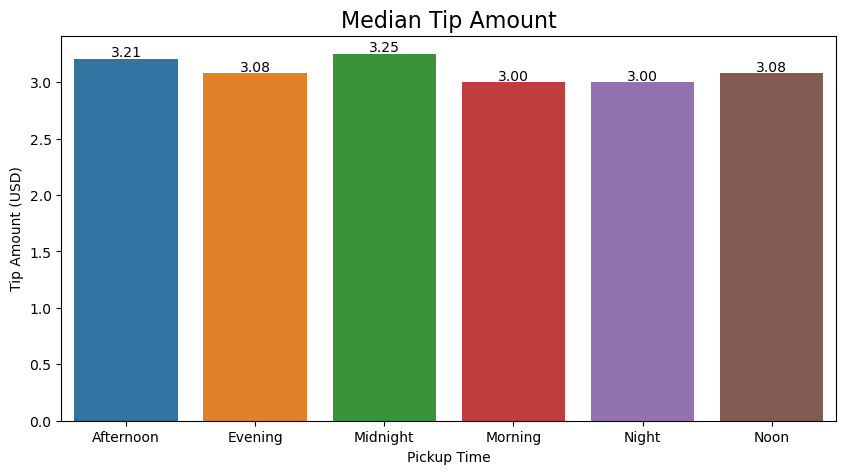

In [90]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=tip_putime, x='pickup_hour', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.02
    label = "{:.2f}".format(tip_putime['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
    
plt.xlabel('Pickup Time')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=16)
plt.show()

**Hipotesis**
- H0 = Tidak ada perbedaan pada pick up hour (pick up hour tidak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)
- H1 = Ada perbedaan pick up hour (pick up hour memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)

In [91]:
from scipy.stats import kruskal

stat, p_value= kruskal(
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Midnight']['tip_amount'].sample(100, random_state=0),
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Morning']['tip_amount'].sample(100, random_state=0),
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Noon']['tip_amount'].sample(100, random_state=0),
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Evening']['tip_amount'].sample(100, random_state=0),
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Night']['tip_amount'].sample(100, random_state=0),
    tip_putime_corr[tip_putime_corr['pickup_hour'] == 'Afternoon']['tip_amount'].sample(100, random_state=0)
)

print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
    print("Tolak H0, jam penjemputan memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.")
else:
    print("Gagal menolak H0,  jam penjemputan tidak mempengaruhi jumlah tip yang diberikan oleh penumpang.")


p-value 0.4262037454015537
Gagal menolak H0,  jam penjemputan tidak mempengaruhi jumlah tip yang diberikan oleh penumpang.


### **Trip Type**

In [92]:
tip_trip_type_corr = df[df['tip_amount']>0][['trip_type_dics', 'tip_amount']]
tip_trip_type= tip_trip_type_corr.groupby('trip_type_dics').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_trip_type

,trip_type_dics,count,avg_tip,median_tip
0,Dispatch,235,7.01,5.00
1,Street-hail,36598,3.69,3.06


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\239032044.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=tip_trip_type, x='trip_type_dics', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\239032044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=tip_trip_type, x='trip_type_dics', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\239032044.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  bars = sns.barplot(data=tip_trip_type, x='trip_type_dics', y='median_tip', ci=0, palette=color)


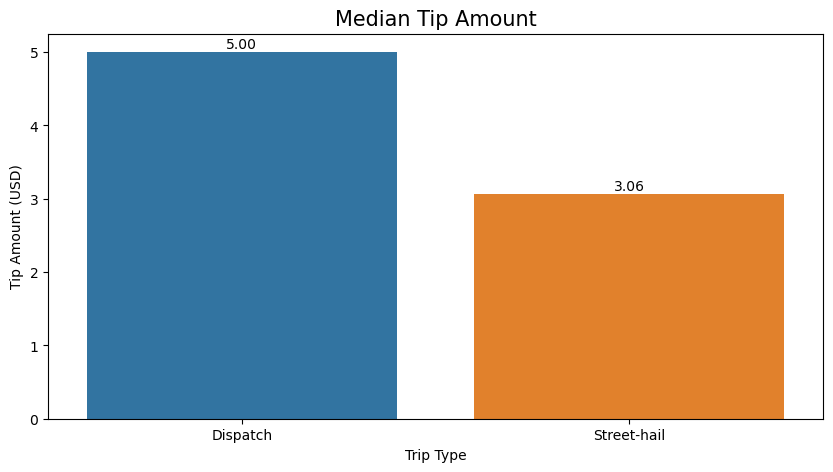

In [93]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=tip_trip_type, x='trip_type_dics', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(tip_trip_type['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Trip Type')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)

plt.show()

**Hipotesis**
- H0 : Tidak ada perbedaan jumlah tip antara tipe perjalanan discpact dan street-hail.
- H1 : Jumlah tip street hail < jumlah tip dispatch

In [94]:
from scipy.stats import mannwhitneyu

stat, p_value= mannwhitneyu(
    tip_trip_type_corr[tip_trip_type_corr['trip_type_dics'] == 'Street-hail']['tip_amount'].sample(100, random_state=0),
    tip_trip_type_corr[tip_trip_type_corr['trip_type_dics'] == 'Dispatch']['tip_amount'].sample(100, random_state=0),
    alternative='less'
)

print('p-value', p_value/2)
alpha = 0.05
if p_value < alpha:
    print("Tolak H0, Jumlah tip street hail lebih kecil dari jumlah tip dispatch")
else:
    print("Gagal menolak H0,  tipe perjalanan tidak mempengaruhi jumlah tip yang diberikan oleh penumpang.")

p-value 0.0002927571791870138
Tolak H0, Jumlah tip street hail lebih kecil dari jumlah tip dispatch


**Kesimpulan**: p-value < 0.05 maka H0 berhasil ditolak sehingga jumlah tip pada street-hail(angku langsung) lebih kecil daripada pada dispatch (pemesanan dari aplikasi).

### **Trip Distance**

In [95]:
tip_distance_corr = df[df['tip_amount']>0][['tip_amount', 'distance_bins']]
tip_distance = tip_distance_corr.groupby('distance_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index().round(2)
tip_distance

,distance_bins,count,avg_tip,median_tip
0,11-20 miles,892,10.42,10.46
1,3-6 miles,14291,3.92,3.92
2,7-10 miles,4364,6.37,6.57
3,<2 miles,17237,2.49,2.44
4,>20 miles,49,14.66,15.65


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2121499848.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=tip_distance, x='distance_bins', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2121499848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=tip_distance, x='distance_bins', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\2121499848.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  bars = sns.barplot(data=tip_distance, x='distance_bins', y='median_tip', ci=0, palette=color)


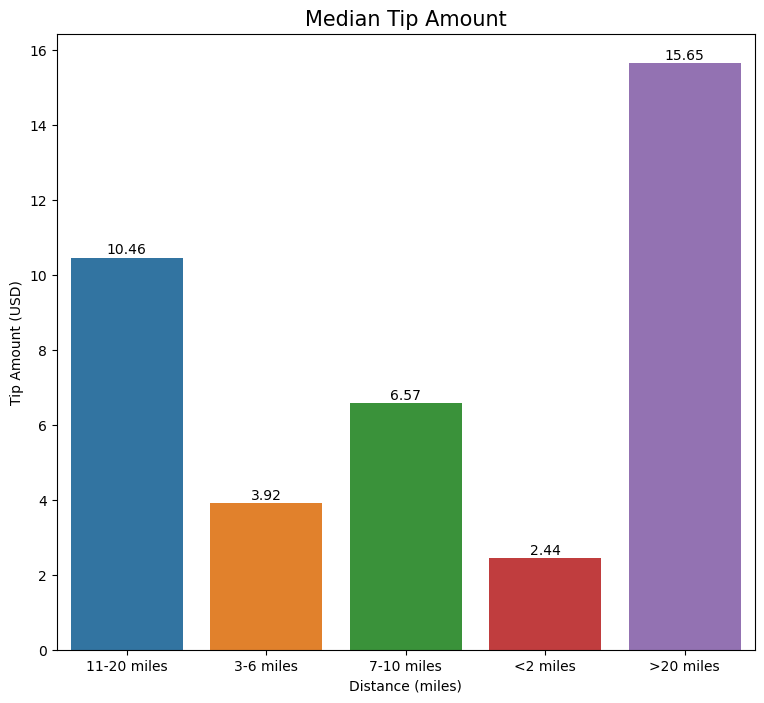

In [96]:
plt.figure(figsize=(9,8))

bars = sns.barplot(data=tip_distance, x='distance_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.1
    label = "{:.2f}".format(tip_distance['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hipotesis**
- H0 = Tidak ada perbedaan signifikan pada jarak (jarak tidak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)
- H1 = Ada perbedaan signifikan pada jarak (pick up hour memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)

In [97]:
stat, p_value= kruskal(
    tip_distance_corr[tip_distance_corr['distance_bins'] == '<2 miles']['tip_amount'].sample(40, random_state=0),
    tip_distance_corr[tip_distance_corr['distance_bins'] == '3-6 miles']['tip_amount'].sample(40, random_state=0),
    tip_distance_corr[tip_distance_corr['distance_bins'] == '7-10 miles']['tip_amount'].sample(40, random_state=0),
    tip_distance_corr[tip_distance_corr['distance_bins'] == '11-20 miles']['tip_amount'].sample(40, random_state=0),
    tip_distance_corr[tip_distance_corr['distance_bins'] == '>20 miles']['tip_amount'].sample(40, random_state=0)
)

print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
    print("Tolak H0, jarak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.")
else:
    print("Gagal menolak H0,  jarak tidak mempengaruhi jumlah tip yang diberikan oleh penumpang.")

p-value 5.0894032151188826e-17
Tolak H0, jarak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.


**Kesimpulan**: p-value < 0.05 maka H0 berhasil ditolak sehingga jarak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.

### **Trip Duration**

In [98]:
tip_duration_corr = df[df['tip_amount']>0][['tip_amount', 'duration_bins']]
tip_duration = tip_duration_corr.groupby('duration_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
tip_duration

,duration_bins,count,avg_tip,median_tip
0,11-20 minutes,16387,3.69,3.55
1,21-30 minutes,4940,5.52,5.37
2,<10 minutes,13466,2.40,2.34
3,>30 minutes,2040,8.19,7.75


C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3789939490.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=tip_duration, x='duration_bins', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3789939490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=tip_duration, x='duration_bins', y='median_tip', ci=0, palette=color)
C:\Users\Fitri A\AppData\Local\Temp\ipykernel_21852\3789939490.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  bars = sns.barplot(data=tip_duration, x='duration_bins', y='median_tip', ci=0, palette=color)


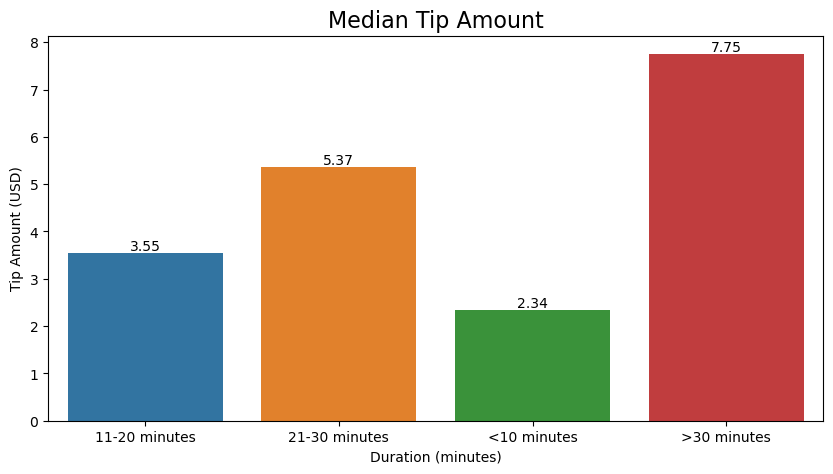

In [99]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=tip_duration, x='duration_bins', y='median_tip', ci=0, palette=color)
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(tip_duration['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Duration (minutes)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=16)
plt.show()

**Hipotesis**
- H0 = Tidak ada perbedaan signifikan pada durasi (durasi tidak memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)
- H1 = Ada perbedaan signifikan pada durasi (durasi memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.)

In [100]:
stat, p_value= kruskal(
    tip_duration_corr[tip_duration_corr['duration_bins'] == '<10 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration_corr[tip_duration_corr['duration_bins'] == '11-20 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration_corr[tip_duration_corr['duration_bins'] == '21-30 minutes']['tip_amount'].sample(100, random_state=0),
    tip_duration_corr[tip_duration_corr['duration_bins'] == '>30 minutes']['tip_amount'].sample(100, random_state=0)
)

print('p-value', p_value)
alpha = 0.05
if p_value < alpha:
    print("Tolak H0, durasi perjalanan memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.")
else:
    print("Gagal menolak H0,  durasiperjalanan tidak mempengaruhi jumlah tip yang diberikan oleh penumpang.")

p-value 2.332289048711968e-33
Tolak H0, durasi perjalanan memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.


**Kesimpulan**: p-value < 0.05 maka H0 berhasil ditolak sehingga durasi memiliki pengaruh terhadap jumlah tip yang diberikan oleh penumpang.

# **Kesimpulan dari Analisis Perjalanan Komuter dan Tip di New York City**

#### 1. Pola Perjalanan Komuter
1. Peningkatan perjalanan terlihat mulai pukul 6 pagi, menurun sekitar pukul 11-12 siang, dan kembali meningkat mulai pukul 3 sore dengan puncaknya pukul 6 sore. Pola ini konsisten dengan jam kerja kantor, mencerminkan aktivitas komuter harian.
2. Hari Selasa memiliki jumlah perjalanan terbanyak, kemungkinan akibat peningkatan perjalanan bisnis yang dimulai setelah hari Senin.
3. Aktivitas perjalanan lebih rendah pada akhir pekan, sesuai dengan preferensi istirahat masyarakat.
4. Jumlah perjalanan paling sedikit terjadi pada dini hari.
5. Sebagian besar perjalanan terjadi di Manhattan, terutama di kawasan East Harlem North dan South, yang memiliki hunian lebih terjangkau bagi pekerja di Manhattan.

#### 2. Perilaku dan Preferensi Pelanggan
1. Newark Airport memiliki rata-rata jumlah tip tertinggi ($10), yang dapat dikaitkan dengan jarak perjalanan yang lebih jauh dibandingkan destinasi lain.
2. Mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama, mencerminkan preferensi untuk kenyamanan dan kepraktisan metode pembayaran elektronik.

#### 3. Faktor yang Mempengaruhi Jumlah Tip
1. Tidak ada perbedaan signifikan antara jumlah tip yang diberikan pada hari kerja (weekdays) dan akhir pekan (weekend).
2. Waktu penjemputan tidak memengaruhi jumlah tip yang diberikan.
3. Berdasarkan analisis statistik:
   - **Jenis Perjalanan**: Tip lebih kecil pada street-hail (angkut langsung) dibandingkan dengan dispatch (pemesanan dari aplikasi).
   - **Jarak Perjalanan**: Semakin jauh perjalanan, semakin tinggi jumlah tip yang diberikan.
   - **Durasi Perjalanan**: Perjalanan yang lebih lama cenderung menghasilkan tip lebih besar.

#### 4. Hubungan Statistik
- Terdapat hubungan positif sedang antara jumlah tip dengan fare_amount (0.62), trip_distance (0.6), dan trip_duration (0.57). Ini menunjukkan bahwa semakin besar biaya perjalanan, jarak, atau durasi perjalanan, semakin tinggi kemungkinan penumpang memberikan tip lebih besar.


# Actionable PlanReccomendation

## 1. Perusahaan Transportasi atau Operator Taksi

### Operasional:
- Alokasikan lebih banyak kendaraan pada jam sibuk pagi (6-11 pagi) dan sore (3-6 sore), serta pada hari Selasa, yang menunjukkan volume perjalanan tertinggi.
- Fokuskan armada di Manhattan dan Queen.
- Pastikan semua kendaraan dilengkapi perangkat pembayaran elektronik yang berfungsi dengan baik.

### Pelatihan Pengemudi:
- Berikan pelatihan kepada pengemudi tentang cara memberikan pengalaman perjalanan yang lebih baik (misalnya, kenyamanan, sikap ramah, pemilihan rute yang efisien) untuk meningkatkan jumlah tip, terutama pada perjalanan jarak jauh dan durasi panjang.


## 2. Otoritas Transportasi Kota (NYC Taxi and Limousine Commission)

### Perencanaan Kebijakan:
- Merancang kebijakan yang mengurangi kemacetan selama jam sibuk, terutama di Manhattan dan area sekitar East Harlem. Misalnya, menambah jalur bus atau kereta api.
- Fokus pada peningkatan infrastruktur transportasi di area dengan volume perjalanan tinggi, seperti Manhattan.

### Monitoring dan Analisis Lanjutan:
- Memantau zona dengan permintaan tinggi secara real-time dan menyesuaikan regulasi atau kebijakan jika diperlukan.

## 3. Perusahaan Teknologi Pemesanan Transportasi

### Peningkatan Algoritma:
- Sesuaikan algoritma untuk memprioritaskan alokasi kendaraan ke area dengan potensi tip lebih tinggi, seperti Newark Airport atau perjalanan jarak jauh.
- Gunakan prediksi permintaan untuk meningkatkan ketersediaan kendaraan di hari Selasa dan jam sibuk.

### Fitur Personalisasi:
- Tambahkan fitur estimasi tip berdasarkan jarak, durasi, dan zona perjalanan untuk memberikan transparansi kepada pelanggan.

### Promosi dan Peningkatan Loyalitas:
- Implementasikan program loyalitas bagi pelanggan yang sering menggunakan aplikasi untuk pemesanan dispatch.
- Tawarkan upgrade gratis ke layanan premium (seperti mobil mewah, Wi-Fi gratis, atau layanan pengemudi khusus) untuk perjalanan bisnis pada hari Selasa dengan harga yang tetap.
- Buat paket langganan bulanan atau mingguan khusus untuk pelanggan bisnis yang sering bepergian pada hari Selasa, dengan potongan harga atau layanan tambahan, seperti prioritas pemesanan atau jaminan waktu kedatangan lebih cepat.
